# Separate runs by HKLE due to size limits

In [1]:
datafile='focused.1000.T.csv.gz'

In [2]:
hkle='HERVK113'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

In [3]:
threshold=3

---

In [4]:
import numpy as np
np.__version__

'1.20.3'

In [5]:
import pandas as pd
pd.__version__

'1.2.4'

In [6]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [9]:
import scipy
scipy.__version__

'1.7.0'

In [10]:
from scipy import stats

In [11]:
import seaborn as sns
sns.__version__

'0.11.1'

In [12]:
from datetime import datetime

In [13]:
default_max_columns=pd.get_option('display.max_columns')

In [14]:
default_max_rows=pd.get_option('display.max_rows')

In [15]:
default_precision=pd.get_option('display.precision')

In [16]:
pd.set_option('display.precision', 2)

In [17]:
#default_threshold=np.get_printoptions()['threshold']

In [18]:
#np.set_printoptions(threshold=10000000)

---

# Read Metadata 1

In [19]:
mt1=pd.read_csv("metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['subject','sequencing','days_to_death','gender','disease_type','center_name','unknown'])
mt1.head()

,subject,sequencing,days_to_death,gender,disease_type,center_name,unknown
0,02-2483,02-2483-01A-01D-1494-08,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,02-2483,02-2483-10A-01D-1494-08,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
2,02-2485,02-2485-01A-01D-1494-08,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
3,02-2485,02-2485-10A-01D-1494-08,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
4,06-0125,06-0125-01A-01D-1490-08,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3


In [20]:
mt1.shape

(278, 7)

In [21]:
mt1.rename(columns={"submitter": "subject"},inplace=True)
mt1.rename(columns={"gender": "gender1"},inplace=True)
mt1.shape

(278, 7)

In [22]:
mt1=mt1.drop('sequencing',axis='columns')
mt1=mt1.drop_duplicates()
mt1.shape

(127, 6)

In [23]:
list(mt1)

['subject',
 'days_to_death',
 'gender1',
 'disease_type',
 'center_name',
 'unknown']

In [24]:
mt1['subject']

0      02-2483
2      02-2485
4      06-0125
7      06-0152
8      06-0157
        ...   
263    IK-7675
265    TM-A7CF
268    TQ-A7RK
272    TQ-A7RV
275    TQ-A8XE
Name: subject, Length: 127, dtype: object

---

# Read Metadata 2

In [25]:
mt2=pd.read_csv("TCGA.Glioma.metadata.tsv",sep="\t")

In [26]:
mt2.shape

(1114, 18)

In [27]:
mt2.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,TCGA-02-0001,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,44.0,11.76,1.0
1,TCGA-02-0003,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,50.0,4.73,1.0
2,TCGA-02-0004,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,NaN,NaN,IDH-WT:1p19q-NA,NaN,IDH-WT:1p19q-NA:TERT-NA,MD Anderson Cancer Center,NaN,59.0,11.33,1.0
3,TCGA-02-0006,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,56.0,18.33,1.0
4,TCGA-02-0007,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,40.0,23.16,1.0


In [28]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [29]:
mt2['subject']=mt2['case_submitter_id'].astype(str).str[5:12]

In [30]:
mt2[['subject','case_submitter_id']].head()

,subject,case_submitter_id
0,02-0001,TCGA-02-0001
1,02-0003,TCGA-02-0003
2,02-0004,TCGA-02-0004
3,02-0006,TCGA-02-0006
4,02-0007,TCGA-02-0007


In [31]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [32]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject']

---

# Merge Metadata

In [33]:
meta=mt2.merge(mt1,on='subject',suffixes=["_mt2","_mt1"],how='inner')

In [34]:
del mt1
del mt2

In [35]:
meta.head()

,project_id,primary_diagnosis,race,ethnicity,gender2,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,...,MGMT,Age,Survival_months,Vital_status,subject,days_to_death,gender1,disease_type,center_name,unknown
0,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,Methylated,43.0,15.31,0.0,02-2483,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,Unmethylated,53.0,15.44,0.0,02-2485,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
2,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,Methylated,63.0,47.57,1.0,06-0125,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
3,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,...,NaN,68.0,12.32,1.0,06-0152,375.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
4,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0157-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,NaN,63.0,3.19,1.0,06-0157,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3


In [36]:
meta.drop(meta[(meta['subject']=='CS-6186') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [37]:
meta.drop(meta[(meta['subject']=='DU-5872') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [38]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name', 'unknown'],
      dtype='object')

In [39]:
meta['primary_diagnosis'].value_counts()

Glioblastoma                     35
Oligodendroglioma, NOS           33
Astrocytoma, anaplastic          24
Mixed glioma                     16
Astrocytoma, NOS                  9
Oligodendroglioma, anaplastic     8
Name: primary_diagnosis, dtype: int64

In [40]:
meta['TERT'].value_counts()

Mutant    68
WT        54
Name: TERT, dtype: int64

In [41]:
meta['IDH'].value_counts()

Mutant    74
WT        50
Name: IDH, dtype: int64

In [42]:
meta['x1p19q'].value_counts()

non-codel    102
codel         23
Name: x1p19q, dtype: int64

In [43]:
meta['disease_type'].value_counts()

Brain Lower Grade Glioma    90
Glioblastoma Multiforme     35
Name: disease_type, dtype: int64

In [44]:
meta['gender1'].value_counts()

male      72
female    53
Name: gender1, dtype: int64

In [45]:
meta['race'].value_counts()

white                        114
black or african american      7
not reported                   3
asian                          1
Name: race, dtype: int64

In [46]:
meta['ethnicity'].value_counts()

not hispanic or latino    108
not reported               11
hispanic or latino          6
Name: ethnicity, dtype: int64

In [47]:
meta['IDH_1p19q_status'].value_counts()

IDH-Mutant:1p19q-non-codel    51
IDH-WT:1p19q-non-codel        50
IDH-Mutant:1p19q-codel        23
IDH-NA:1p19q-non-codel         1
Name: IDH_1p19q_status, dtype: int64

In [48]:
meta['WHO_groups'].value_counts()

glioblastoma:IDH-WT:1p19q-non-codel             29
oligodendroglioma:IDH-Mutant:1p19q-codel        23
astrocytoma:IDH-Mutant:1p19q-non-codel          18
astrocytoma:IDH-WT:1p19q-non-codel              13
oligodendroglioma:IDH-Mutant:1p19q-non-codel    13
oligoastrocytoma:IDH-Mutant:1p19q-non-codel     11
glioblastoma:IDH-Mutant:1p19q-non-codel          5
oligoastrocytoma:IDH-WT:1p19q-non-codel          4
oligodendroglioma:IDH-WT:1p19q-non-codel         4
Name: WHO_groups, dtype: int64

In [49]:
meta['Triple_group'].value_counts()

IDH-Mutant:1p19q-non-codel:TERT-WT        49
IDH-WT:1p19q-non-codel:TERT-Mutant        44
IDH-Mutant:1p19q-codel:TERT-Mutant        22
IDH-WT:1p19q-non-codel:TERT-WT             4
IDH-WT:1p19q-non-codel:TERT-NA             2
IDH-Mutant:1p19q-non-codel:TERT-NA         1
IDH-Mutant:1p19q-codel:TERT-WT             1
IDH-NA:1p19q-non-codel:TERT-Mutant         1
IDH-Mutant:1p19q-non-codel:TERT-Mutant     1
Name: Triple_group, dtype: int64

In [50]:
meta['MGMT'].value_counts()

Methylated      87
Unmethylated    27
Name: MGMT, dtype: int64

In [51]:
meta['center_name'].value_counts()

Broad Institute of MIT and Harvard    75
Harvard Medical School                50
Name: center_name, dtype: int64

---

# Read raw data and cleanup

In [52]:
#df=pd.read_csv("focused.csv.gz",header=[0,1,2,3],index_col=[0,1])
#df.columns.names=['sample','pup','hkle','q']
#df=df.T
df=pd.read_csv(datafile,header=[0,1],index_col=[0,1,2,3])
#df.reset_index(inplace=True)
#df=pd.read_csv(datafile,header=[0,1]) #,index_col=[0,1,2,3])
df.head()

chromosome                                   chr1                          \
position                                  1102000 1308000 1409000 1410000   
sample               pup    hkle     mapq                                   
02-2483-01A-01D-1494 paired HERVK113 Q20        0       0       4       1   
                            SVA_A    Q20        0       0       0       0   
                            SVA_B    Q20        0       0       0       0   
                            SVA_C    Q20        0       0       0       0   
                            SVA_D    Q20        0       0       0       0   

chromosome                                                                 \
position                                  1580000 1581000 2211000 3129000   
sample               pup    hkle     mapq                                   
02-2483-01A-01D-1494 paired HERVK113 Q20        4       0       0       0   
                            SVA_A    Q20        0       0       0       0   
                            SVA_B    Q20        0       0       0       0   
                            SVA_C    Q20        0       0       0       0   
                            SVA_D    Q20        0       0       0       0   

chromosome                                                 ...     chrY  \
position                                  3315000 3321000  ... 15075000   
sample               pup    hkle     mapq                  ...            
02-2483-01A-01D-1494 paired HERVK113 Q20        0       0  ...        0   
                            SVA_A    Q20        0       0  ...        0   
                            SVA_B    Q20        0       0  ...        0   
                            SVA_C    Q20        0       0  ...        0   
                            SVA_D    Q20        0       0  ...        0   

chromosome                                                                     \
position                                  15774000 17181000 19536000 19699000   
sample               pup    hkle     mapq                                       
02-2483-01A-01D-1494 paired HERVK113 Q20         0        0        0        2   
                            SVA_A    Q20         0        0        0        0   
                            SVA_B    Q20         0        0        0        0   
                            SVA_C    Q20         0        0        0        0   
                            SVA_D    Q20         0        0        0        0   

chromosome                                                                     \
position                                  19700000 20553000 20976000 21047000   
sample               pup    hkle     mapq                                       
02-2483-01A-01D-1494 paired HERVK113 Q20         0        0        0        0   
                            SVA_A    Q20         0        0        0        0   
                            SVA_B    Q20         0        0        0        0   
                            SVA_C    Q20         0        0        0        0   
                            SVA_D    Q20         0        0        0        0   

chromosome                                          
position                                  21217000  
sample               pup    hkle     mapq           
02-2483-01A-01D-1494 paired HERVK113 Q20         0  
                            SVA_A    Q20         0  
                            SVA_B    Q20         0  
                            SVA_C    Q20         0  
                            SVA_D    Q20         0  

[5 rows x 12550 columns]

In [53]:
df.columns= [' '.join(col).strip() for col in df.columns.values]
df.head()

chr1 1102000  chr1 1308000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   

                                           chr1 1409000  chr1 1410000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              4             1   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   

                                           chr1 1580000  chr1 1581000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              4             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   

                                           chr1 2211000  chr1 3129000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   

                                           chr1 3315000  chr1 3321000  ...  \
sample               pup    hkle     mapq                              ...   
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0  ...   
                            SVA_A    Q20              0             0  ...   
                            SVA_B    Q20              0             0  ...   
                            SVA_C    Q20              0             0  ...   
                            SVA_D    Q20              0             0  ...   

                                           chrY 15075000  chrY 15774000  \
sample               pup    hkle     mapq                                 
02-2483-01A-01D-1494 paired HERVK113 Q20               0              0   
                            SVA_A    Q20               0              0   
                            SVA_B    Q20               0              0   
                            SVA_C    Q20               0              0   
                            SVA_D    Q20               0              0   

                                           chrY 17181000  chrY 19536000  \
sample               pup    hkle     mapq                                 
02-2483-01A-01D-1494 paired HERVK113 Q20               0              0   
                            SVA_A    Q20               0              0   
                            SVA_B    Q20               0              0   
                            SVA_C    Q20               0              0   
                            SVA_D    Q20               0              0   

                                           chrY 19699000  chrY 19700000  \
sample               pup    hkle     mapq                                 
02-2483-01A-01D-1494 paired HERVK113 Q20               2              0   
                            SVA_A    Q20               0              0   
                            SVA_B    Q20               0              0   
                     

In [54]:
df.reset_index(inplace=True)

In [55]:
#df.rename(columns={"sample": "sequencing"},inplace=True)
#df['sample']=df['sequencing'].str[0:11]
df['sample']=df['sample'].str[0:11]
df['subject']=df['sample'].str[0:7]
df['subject']

0       02-2483
1       02-2483
2       02-2483
3       02-2483
4       02-2483
         ...   
1024    TQ-A8XE
1025    TQ-A8XE
1026    TQ-A8XE
1027    TQ-A8XE
1028    TQ-A8XE
Name: subject, Length: 1029, dtype: object

In [56]:
df.columns

Index(['sample', 'pup', 'hkle', 'mapq', 'chr1 1102000', 'chr1 1308000',
       'chr1 1409000', 'chr1 1410000', 'chr1 1580000', 'chr1 1581000',
       ...
       'chrY 15774000', 'chrY 17181000', 'chrY 19536000', 'chrY 19699000',
       'chrY 19700000', 'chrY 20553000', 'chrY 20976000', 'chrY 21047000',
       'chrY 21217000', 'subject'],
      dtype='object', length=12555)

In [57]:
df.head()

,sample,pup,hkle,mapq,chr1 1102000,chr1 1308000,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,...,chrY 15774000,chrY 17181000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,chrY 21047000,chrY 21217000,subject
0,02-2483-01A,paired,HERVK113,Q20,0,0,4,1,4,0,...,0,0,0,2,0,0,0,0,0,02-2483
1,02-2483-01A,paired,SVA_A,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,02-2483
2,02-2483-01A,paired,SVA_B,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,02-2483
3,02-2483-01A,paired,SVA_C,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,02-2483
4,02-2483-01A,paired,SVA_D,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,02-2483


In [58]:
df=df[df['hkle']==hkle]

In [59]:
#df.set_index(['subject','sample','sequencing','pup','hkle','mapq'],inplace=True)
df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
df.head()

chr1 1102000  chr1 1308000  \
subject sample      pup    hkle     mapq                               
02-2483 02-2483-01A paired HERVK113 Q20              0             0   
        02-2483-10A paired HERVK113 Q20              0             0   
02-2485 02-2485-01A paired HERVK113 Q20              0             0   
        02-2485-10A paired HERVK113 Q20              0             0   
06-0125 06-0125-01A paired HERVK113 Q20              0             0   

                                          chr1 1409000  chr1 1410000  \
subject sample      pup    hkle     mapq                               
02-2483 02-2483-01A paired HERVK113 Q20              4             1   
        02-2483-10A paired HERVK113 Q20              2             3   
02-2485 02-2485-01A paired HERVK113 Q20              3             4   
        02-2485-10A paired HERVK113 Q20              8             0   
06-0125 06-0125-01A paired HERVK113 Q20              9             6   

                                          chr1 1580000  chr1 1581000  \
subject sample      pup    hkle     mapq                               
02-2483 02-2483-01A paired HERVK113 Q20              4             0   
        02-2483-10A paired HERVK113 Q20              3             0   
02-2485 02-2485-01A paired HERVK113 Q20              4             0   
        02-2485-10A paired HERVK113 Q20              0             0   
06-0125 06-0125-01A paired HERVK113 Q20              9             0   

                                          chr1 2211000  chr1 3129000  \
subject sample      pup    hkle     mapq                               
02-2483 02-2483-01A paired HERVK113 Q20              0             0   
        02-2483-10A paired HERVK113 Q20              0             0   
02-2485 02-2485-01A paired HERVK113 Q20              0             0   
        02-2485-10A paired HERVK113 Q20              0             0   
06-0125 06-0125-01A paired HERVK113 Q20              0             0   

                                          chr1 3315000  chr1 3321000  ...  \
subject sample      pup    hkle     mapq                              ...   
02-2483 02-2483-01A paired HERVK113 Q20              0             0  ...   
        02-2483-10A paired HERVK113 Q20              0             0  ...   
02-2485 02-2485-01A paired HERVK113 Q20              0             0  ...   
        02-2485-10A paired HERVK113 Q20              0             0  ...   
06-0125 06-0125-01A paired HERVK113 Q20              0             0  ...   

                                          chrY 15075000  chrY 15774000  \
subject sample      pup    hkle     mapq                                 
02-2483 02-2483-01A paired HERVK113 Q20               0              0   
        02-2483-10A paired HERVK113 Q20               0              1   
02-2485 02-2485-01A paired HERVK113 Q20               0              0   
        02-2485-10A paired HERVK113 Q20               0              0   
06-0125 06-0125-01A paired HERVK113 Q20               0              0   

                                          chrY 17181000  chrY 19536000  \
subject sample      pup    hkle     mapq                                 
02-2483 02-2483-01A paired HERVK113 Q20               0              0   
        02-2483-10A paired HERVK113 Q20               0              0   
02-2485 02-2485-01A paired HERVK113 Q20               0              0   
        02-2485-10A paired HERVK113 Q20               0              0   
06-0125 06-0125-01A paired HERVK113 Q20               0              0   

                                          chrY 19699000  chrY 19700000  \
subject sample      pup    hkle     mapq                                 
02-2483 02-2483-01A paired HERVK113 Q20               2              0   
        02-2483-10A paired HERVK113 Q20               1              1   
02-2485 02-2485-01A paired HERVK113 Q20               0              1   
        02-2485-10A paired HERVK113 Q20               1              0   


In [60]:
df.shape

(147, 12550)

---

## Remove "pup" and "q" as they are useless in this dataset.

In [61]:
df=df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')

In [62]:
df.head()

chr1 1102000  chr1 1308000  chr1 1409000  chr1 1410000  \
subject sample                                                                
02-2483 02-2483-01A             0             0             4             1   
        02-2483-10A             0             0             2             3   
02-2485 02-2485-01A             0             0             3             4   
        02-2485-10A             0             0             8             0   
06-0125 06-0125-01A             0             0             9             6   

                     chr1 1580000  chr1 1581000  chr1 2211000  chr1 3129000  \
subject sample                                                                
02-2483 02-2483-01A             4             0             0             0   
        02-2483-10A             3             0             0             0   
02-2485 02-2485-01A             4             0             0             0   
        02-2485-10A             0             0             0             0   
06-0125 06-0125-01A             9             0             0             0   

                     chr1 3315000  chr1 3321000  ...  chrY 15075000  \
subject sample                                   ...                  
02-2483 02-2483-01A             0             0  ...              0   
        02-2483-10A             0             0  ...              0   
02-2485 02-2485-01A             0             0  ...              0   
        02-2485-10A             0             0  ...              0   
06-0125 06-0125-01A             0             0  ...              0   

                     chrY 15774000  chrY 17181000  chrY 19536000  \
subject sample                                                     
02-2483 02-2483-01A              0              0              0   
        02-2483-10A              1              0              0   
02-2485 02-2485-01A              0              0              0   
        02-2485-10A              0              0              0   
06-0125 06-0125-01A              0              0              0   

                     chrY 19699000  chrY 19700000  chrY 20553000  \
subject sample                                                     
02-2483 02-2483-01A              2              0              0   
        02-2483-10A              1              1              0   
02-2485 02-2485-01A              0              1              0   
        02-2485-10A              1              0              0   
06-0125 06-0125-01A              0              0              0   

                     chrY 20976000  chrY 21047000  chrY 21217000  
subject sample                                                    
02-2483 02-2483-01A              0              0              0  
        02-2483-10A              0              0              0  
02-2485 02-2485-01A              1              0              0  
        02-2485-10A              0              0              0  
06-0125 06-0125-01A              0              0              0  

[5 rows x 12550 columns]

In [63]:
df.shape

(147, 12550)

---

## Drop recurrent tumor (-02?)

---

## Drop solid normal (-11?) (I've seen a couple)

---

## Drop solitary tumor / normal ( not sure how to do this programmatically )

* FG-5963-01A
* CS-5390-10A

In [64]:
df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample'])

In [65]:
df.drop(df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index,axis='index',inplace=True)

In [66]:
df.loc[df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample'])

In [67]:
df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([('CS-5390', 'CS-5390-10A')],
           names=['subject', 'sample'])

In [68]:
df.drop(df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index,axis='index',inplace=True)

In [69]:
df.loc[df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([], names=['subject', 'sample'])

In [70]:
df.shape

(146, 12550)

---

In [71]:
df[df>threshold].count(axis='columns')

subject  sample     
02-2483  02-2483-01A    104
         02-2483-10A    102
02-2485  02-2485-01A    135
         02-2485-10A     70
06-0125  06-0125-01A    267
                       ... 
TQ-A7RK  TQ-A7RK-10A     38
TQ-A7RV  TQ-A7RV-01A     89
         TQ-A7RV-10A     46
TQ-A8XE  TQ-A8XE-01A    134
         TQ-A8XE-10A     47
Length: 146, dtype: int64

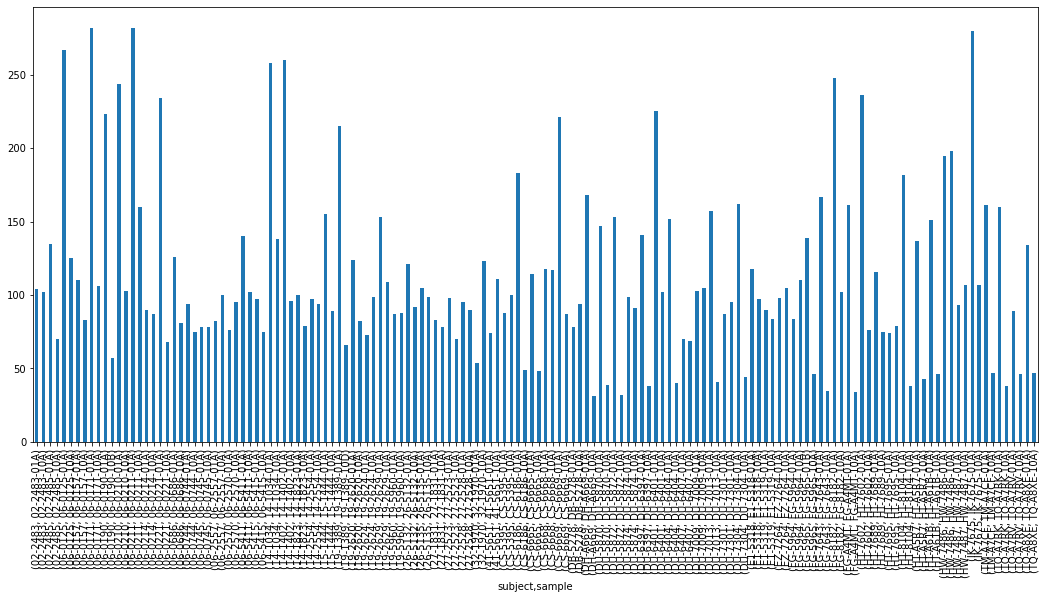

In [72]:
#tmp=df[df>threshold].loc[:,:,'HERVK113'].count(axis='columns')
tmp=df[df>threshold].count(axis='columns')
tmp[tmp>=0].plot(kind='bar')
plt.show()

# Match earlier HERVK113 notebook counts
* CS-5390-10A - 553
* FG-5963-01A - 68
* CS-6186-01A - 1100
* CS-6186-10A - 950
* DU-5872-01A - 1108
* DU-5872-10A - 776
* 02-2483-01A - 568
* 02-2483-10A - 557
* 02-2485-01A - 587
* 02-2485-10A - 498
* 06-0125-01A - 734

## Keep only Broad and drop Harvard Medical School

### Harvard's samples were really low coverage?

## Search for the presence of HKLE insertions with positions unique to tumor or normal

### Copy raw dataframe, remove sample level and clear out the values

compdf2=df.copy()
compdf2.drop(compdf2.loc[compdf2.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)
compdf2=compdf2.droplevel('sample',axis='index')
compdf2.loc[:,:] = 0
compdf2.head(10)

## Ok. This is some dark magic I think. Gotta be a better, cleaner way to do this.

* Loop over the subjects and hkles. (Loops aren't really pythony.)
* Do an "XOR-AND" for the first (tumor 01) and second (normal 10) samples.
* This returns a Boolean mask
* Change it to 0/1
* Subtract the tumor array from the normal array and assign it to the subject/hkle

### This will create a dataframe of positions representing "tumor - normal" so with values of only

* -1 : normal only
*  0 : both or neither
* +1 : tumor only


for subject in df.index.get_level_values('subject').unique():
    for hkle in df.index.get_level_values('hkle').unique():
        tm=(((  df.loc[subject,:,hkle].iloc[0]>0)^(
                df.loc[subject,:,hkle].iloc[1]>0))&(
                df.loc[subject,:,hkle].iloc[0]>0))
        tm.replace([False,True],[0,1],inplace=True)
        nm=(((  df.loc[subject,:,hkle].iloc[0]>0)^(
                df.loc[subject,:,hkle].iloc[1]>0))&(
                df.loc[subject,:,hkle].iloc[1]>0))
        nm.replace([False,True],[0,1],inplace=True)
        compdf2.loc[subject,hkle]=tm.values-nm.values

compdf.equals(compdf2)

# New technique. Separate the tumor and normal counts.
### Remove the sample column
### DO NOT RESHAPE

In [73]:
n=df.copy()    # NORMAL
t=df.copy()    # TUMOR

In [74]:
n.drop(n.loc[n.index.get_level_values('sample').str.contains("-01.$")].index,axis='index',inplace=True)
t.drop(t.loc[t.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)

In [75]:
n=n.droplevel('sample',axis='index')
t=t.droplevel('sample',axis='index')

In [76]:
n.head()

,chr1 1102000,chr1 1308000,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 2211000,chr1 3129000,chr1 3315000,chr1 3321000,...,chrY 15075000,chrY 15774000,chrY 17181000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,chrY 21047000,chrY 21217000
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,0,0,2,3,3,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
02-2485,0,0,8,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
06-0125,0,0,3,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0157,0,0,1,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0171,0,0,5,2,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0


In [77]:
t.head()

,chr1 1102000,chr1 1308000,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 2211000,chr1 3129000,chr1 3315000,chr1 3321000,...,chrY 15075000,chrY 15774000,chrY 17181000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,chrY 21047000,chrY 21217000
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,0,0,4,1,4,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
02-2485,0,0,3,4,4,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
06-0125,0,0,9,6,9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0157,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0171,0,0,3,2,4,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [78]:
n_index=n.index
t_index=t.index

### Compare the indexes. An empty array shows that the indexes are the same. Yay.

In [79]:
n_index[n_index != t_index]

Index([], dtype='object', name='subject')

In [80]:
compdf=(((n>0)^(t>0))&(t>0)).replace([False,True],[0,1]) - (((n>0)^(t>0))&(n>0)).replace([False,True],[0,1])

In [81]:
compdf

,chr1 1102000,chr1 1308000,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 2211000,chr1 3129000,chr1 3315000,chr1 3321000,...,chrY 15075000,chrY 15774000,chrY 17181000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,chrY 21047000,chrY 21217000
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,-1,0,0,0,0
02-2485,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,-1,1,0,1,0,0
06-0125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0157,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0171,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,-1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
TM-A7CF,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TQ-A7RK,0,0,0,1,0,0,0,0,0,0,...,0,-1,0,0,1,0,0,1,0,0


### This is cleaner, faster and more pythonic than what follows for compdf.


In [82]:
compdf.head()

,chr1 1102000,chr1 1308000,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 2211000,chr1 3129000,chr1 3315000,chr1 3321000,...,chrY 15075000,chrY 15774000,chrY 17181000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,chrY 21047000,chrY 21217000
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,-1,0,0,0,0
02-2485,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,-1,1,0,1,0,0
06-0125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0157,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0171,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,-1,0,1,0,0


In [83]:
compdf.shape

(73, 12550)

### Keep only positions with any sample with something other than 0

### We lose over 3000 positions

In [84]:
compdf=compdf.loc[:, (compdf != 0).any(axis=0)]

In [85]:
compdf.shape

(73, 1563)

In [86]:
compdf

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11889000,chr1 11891000,chr1 12784000,...,chrY 7180000,chrY 7711000,chrY 12462000,chrY 12463000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19699000,chrY 19700000,chrY 20976000
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,0,0,0,0,-1,0,0,0,1,0,...,-1,0,1,0,0,0,-1,0,-1,0
02-2485,0,1,1,0,0,0,-1,0,0,0,...,0,0,1,-1,-1,0,0,-1,1,1
06-0125,0,0,0,0,-1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
06-0157,0,1,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
06-0171,0,0,1,0,1,0,1,1,0,0,...,0,0,-1,0,0,1,0,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,0,0,0,1,0,0,1,0,1,0,...,1,0,1,-1,0,1,1,0,0,0
TM-A7CF,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TQ-A7RK,0,1,0,0,1,1,-1,0,0,0,...,-1,1,0,1,0,0,-1,1,0,1


### Get the chromosome columns for analysis after merging with the metadata

In [87]:
#chromosome_columns=compdf.columns[compdf.columns.get_level_values('chromosome').str.contains("^chr")]
chromosome_columns=compdf.columns[compdf.columns.str.contains("^chr")]
chromosome_columns

Index(['chr1 1409000', 'chr1 1410000', 'chr1 1580000', 'chr1 5573000',
       'chr1 9002000', 'chr1 10425000', 'chr1 10427000', 'chr1 11889000',
       'chr1 11891000', 'chr1 12784000',
       ...
       'chrY 7180000', 'chrY 7711000', 'chrY 12462000', 'chrY 12463000',
       'chrY 13103000', 'chrY 13104000', 'chrY 15774000', 'chrY 19699000',
       'chrY 19700000', 'chrY 20976000'],
      dtype='object', length=1563)

### Merge with the metadata for later grouping

In [88]:
compdf.reset_index(inplace=True)
compdf=pd.merge(compdf,meta,on='subject',how='left')
#compdf=compdf.merge(meta,on='subject',how='inner')
#compdf=compdf.merge(meta,on='subject')
#compdf.set_index(['subject','hkle'],inplace=True)
compdf.set_index(['subject'],inplace=True)
compdf.head()

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11889000,chr1 11891000,chr1 12784000,...,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,days_to_death,gender1,disease_type,center_name,unknown
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,0,0,0,0,-1,0,0,0,1,0,...,MD Anderson Cancer Center,Methylated,43.0,15.31,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
02-2485,0,1,1,0,0,0,-1,0,0,0,...,MD Anderson Cancer Center,Unmethylated,53.0,15.44,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
06-0125,0,0,0,0,-1,0,0,0,1,0,...,Henry Ford Hospital,Methylated,63.0,47.57,1.0,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
06-0157,0,1,0,1,1,1,1,0,1,0,...,Henry Ford Hospital,NaN,63.0,3.19,1.0,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
06-0171,0,0,1,0,1,0,1,1,0,0,...,Henry Ford Hospital,NaN,65.0,13.11,1.0,399.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3


### More dark magic here. 

* Select all subjects and HERVK113 on the y-axis and all the chromosome columns on the x-axis.
* We will count all the incidence of each of the previously computed "tumor-normal" values
* Then we will transpose and sort descending by "-1". This will put the highest occurence of normal at the top.


In [89]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210620 20:58:19'

In [90]:
compdf.shape

(73, 1585)

In [91]:
#compdf.loc[pd.IndexSlice[:,hkle],chromosome_columns].apply(
compdf[chromosome_columns].apply(
    pd.Series.value_counts, axis=0).T.sort_values(by=[-1],ascending=False).head(10)


,-1,0,1
chr19 20157000,24.0,33.0,16.0
chr19 37320000,23.0,30.0,20.0
chr6 99430000,22.0,37.0,14.0
chr16 23599000,22.0,31.0,20.0
chr20 29440000,20.0,39.0,14.0
chr5 30496000,20.0,34.0,19.0
chr8 43740000,20.0,38.0,15.0
chr21 44282000,20.0,36.0,17.0
chr19 23078000,20.0,28.0,25.0
chr19 28130000,19.0,34.0,20.0


In [92]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210620 20:58:20'

### We see that the unique normal positions aren't really that unique.

### If we do the same, but sort by tumor ...

In [93]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210620 20:58:20'

In [94]:
#compdf.loc[pd.IndexSlice[:,hkle],chromosome_columns].apply(
#compdf.loc[pd.IndexSlice[:,],chromosome_columns].apply(
compdf[chromosome_columns].apply(
    pd.Series.value_counts, axis=0).T.sort_values(by=[1],ascending=False).head(10)


,-1,0,1
chr19 37629000,10.0,30.0,33.0
chr20 7957000,9.0,33.0,31.0
chr7 99432000,5.0,38.0,30.0
chr1 65140000,10.0,34.0,29.0
chr9 111876000,15.0,29.0,29.0
chr12 37739000,17.0,27.0,29.0
chr20 25242000,12.0,32.0,29.0
chr7 54675000,7.0,38.0,28.0
chr12 123492000,11.0,34.0,28.0
chr5 151426000,11.0,34.0,28.0


In [95]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210620 20:58:21'

### These values seem to be a bit more lopsided.

### Further analysis forthcoming.

compdf.loc[pd.IndexSlice[:,'HERVK113'],chromosome_columns].apply(
    pd.Series.value_counts, axis=0).T.sort_values(by=[1],ascending=False).head(10)


Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'subject', 'days_to_death',
       'gender1', 'disease_type', 'center_name'],

In [96]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")
#    selected=['subject','sample','Lab kit','trimmer','diag','idh']
    selected=['subject',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    if len(selected) > 3: #7:
#        for trimmer in 'bbduk2','cutadapt2':
#            for labkit in dfn['Lab kit'].unique():
        tmp=localdf[selected].copy()
#        tmp=tmp[(tmp['trimmer']==trimmer) & (tmp['Lab kit']==labkit)]
#        tmp=tmp.drop('trimmer',axis='columns')
#        tmp=tmp.drop('Lab kit',axis='columns')
#        tmp.set_index(['subject','sample','diag','idh'],inplace=True)
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        #tmp1=tmp.sort_values(['diag']).T
#        tmp=tmp.sort_values(['idh','diag'])
        tmp=tmp.sort_values([group_column])
        #print(tmp.head())
#        tmp.drop(['subject'],inplace=True,axis='columns')
#        tmp.set_index(['sample','idh'],inplace=True)
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        #lut = dict(zip(diagnoses.unique(), "rgbcmykb"))
        #col_colors = diagnoses.map(lut)
        #print(col_colors)
        #print(tmp.columns)

        tmp=tmp.T

        #print('pal')
        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
    else:
        print("Not enough data to produce cluster maps")
        

In [97]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210620 20:58:21'

In [99]:
compdf.reset_index(inplace=True)
compdf.head()

,subject,chr1 1409000,chr1 1410000,chr1 1580000,chr1 5573000,chr1 9002000,chr1 10425000,chr1 10427000,chr1 11889000,chr1 11891000,...,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,days_to_death,gender1,disease_type,center_name,unknown
0,02-2483,0,0,0,0,-1,0,0,0,1,...,MD Anderson Cancer Center,Methylated,43.0,15.31,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,02-2485,0,1,1,0,0,0,-1,0,0,...,MD Anderson Cancer Center,Unmethylated,53.0,15.44,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
2,06-0125,0,0,0,0,-1,0,0,0,1,...,Henry Ford Hospital,Methylated,63.0,47.57,1.0,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
3,06-0157,0,1,0,1,1,1,1,0,1,...,Henry Ford Hospital,NaN,63.0,3.19,1.0,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
4,06-0171,0,0,1,0,1,0,1,1,0,...,Henry Ford Hospital,NaN,65.0,13.11,1.0,399.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3


primary_diagnosis
T-Testing
Boxplotting
 p : 7.912720410425795e-11  ( t : 8.98003483517885 ) :  chr7 4600000


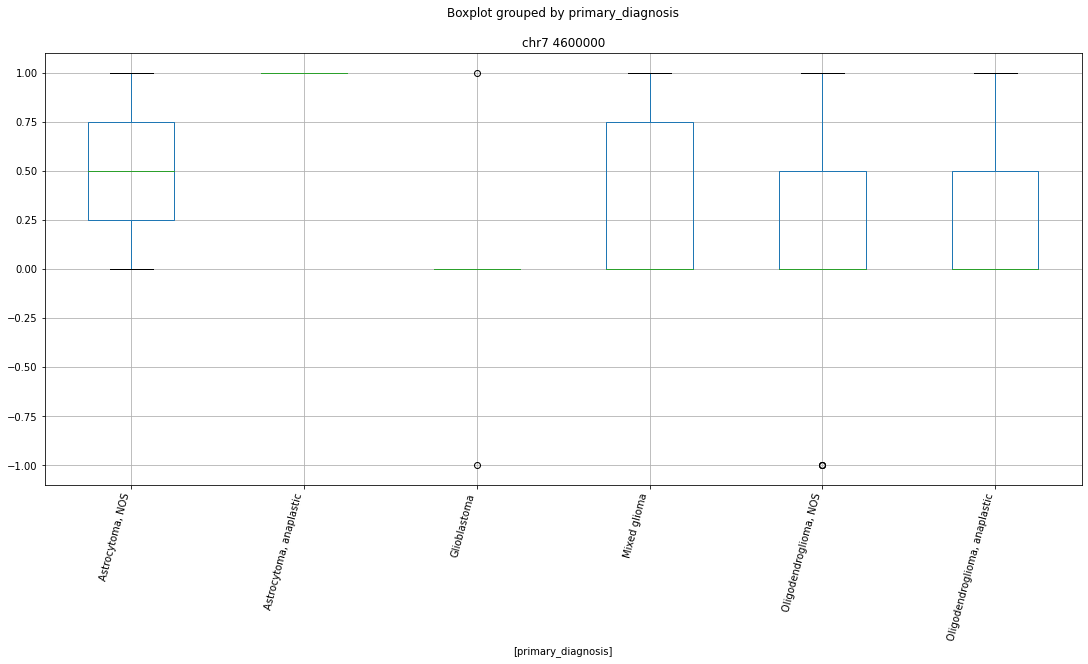

 p : 1.0643040433143633e-09  ( t : 9.242757782641036 ) :  chr12 105478000


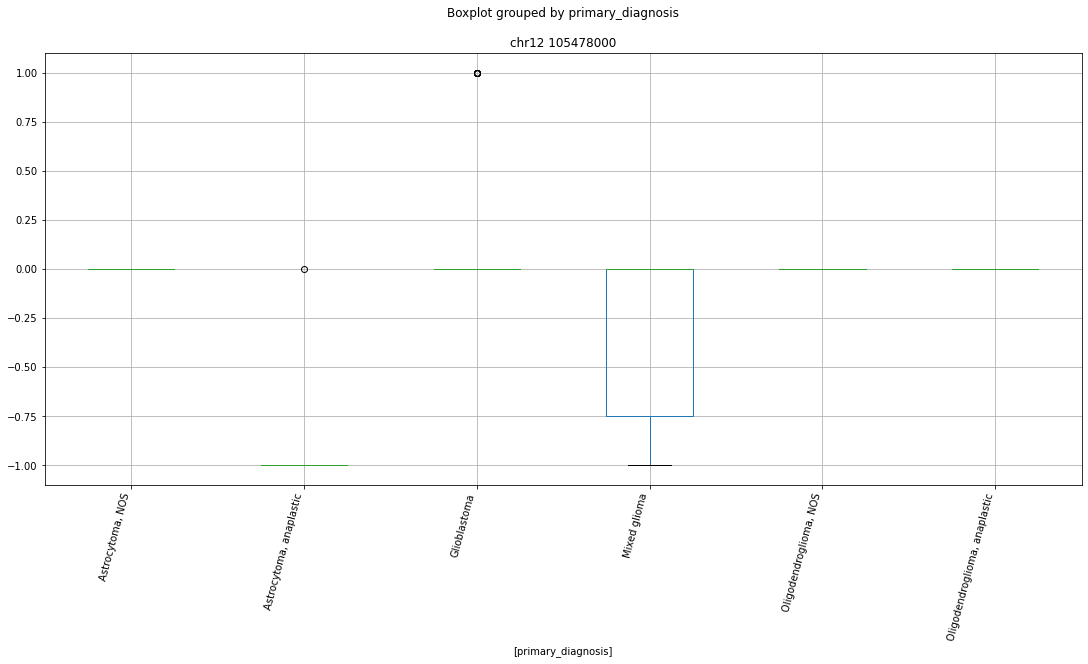

 p : 3.4049793131136327e-09  ( t : 7.895146188218008 ) :  chr13 98765000


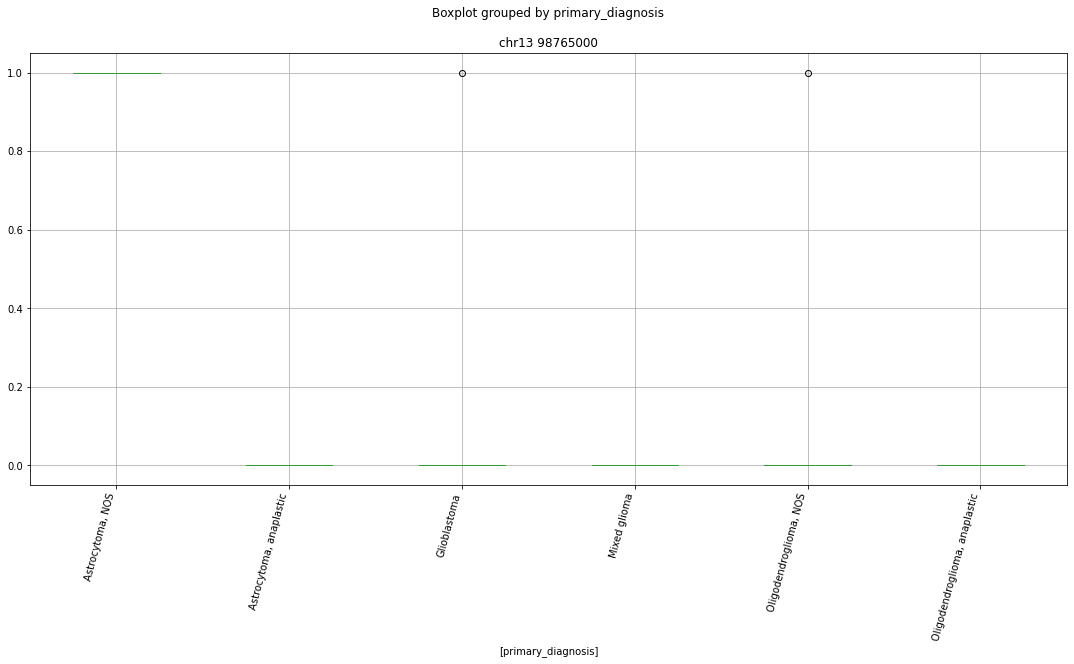

Clustermapping
['chr1 104135000' 'chr1 111800000' 'chr1 112898000' 'chr1 12784000'
 'chr1 144451000' 'chr1 149093000' 'chr1 150632000' 'chr1 15135000'
 'chr1 152797000' 'chr1 15379000' 'chr1 155600000' 'chr1 155626000'
 'chr1 155635000' 'chr1 1580000' 'chr1 159767000' 'chr1 160913000'
 'chr1 160946000' 'chr1 161315000' 'chr1 161413000' 'chr1 165093000'
 'chr1 179418000' 'chr1 188752000' 'chr1 198129000' 'chr1 209141000'
 'chr1 211223000' 'chr1 211971000' 'chr1 213150000' 'chr1 224340000'
 'chr1 225966000' 'chr1 227606000' 'chr1 247522000' 'chr1 27220000'
 'chr1 29339000' 'chr1 29359000' 'chr1 29360000' 'chr1 33053000'
 'chr1 40572000' 'chr1 45513000' 'chr1 45528000' 'chr1 52006000'
 'chr1 54637000' 'chr1 66425000' 'chr1 70461000' 'chr1 73130000'
 'chr1 75383000' 'chr1 77983000' 'chr1 89066000' 'chr1 93276000'
 'chr1 99856000' 'chr10 102391000' 'chr10 102392000' 'chr10 102455000'
 'chr10 121929000' 'chr10 19510000' 'chr10 26893000' 'chr10 26894000'
 'chr10 3061000' 'chr10 37494000' 'chr

/Users/jake/Library/Python/3.8/lib/python/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


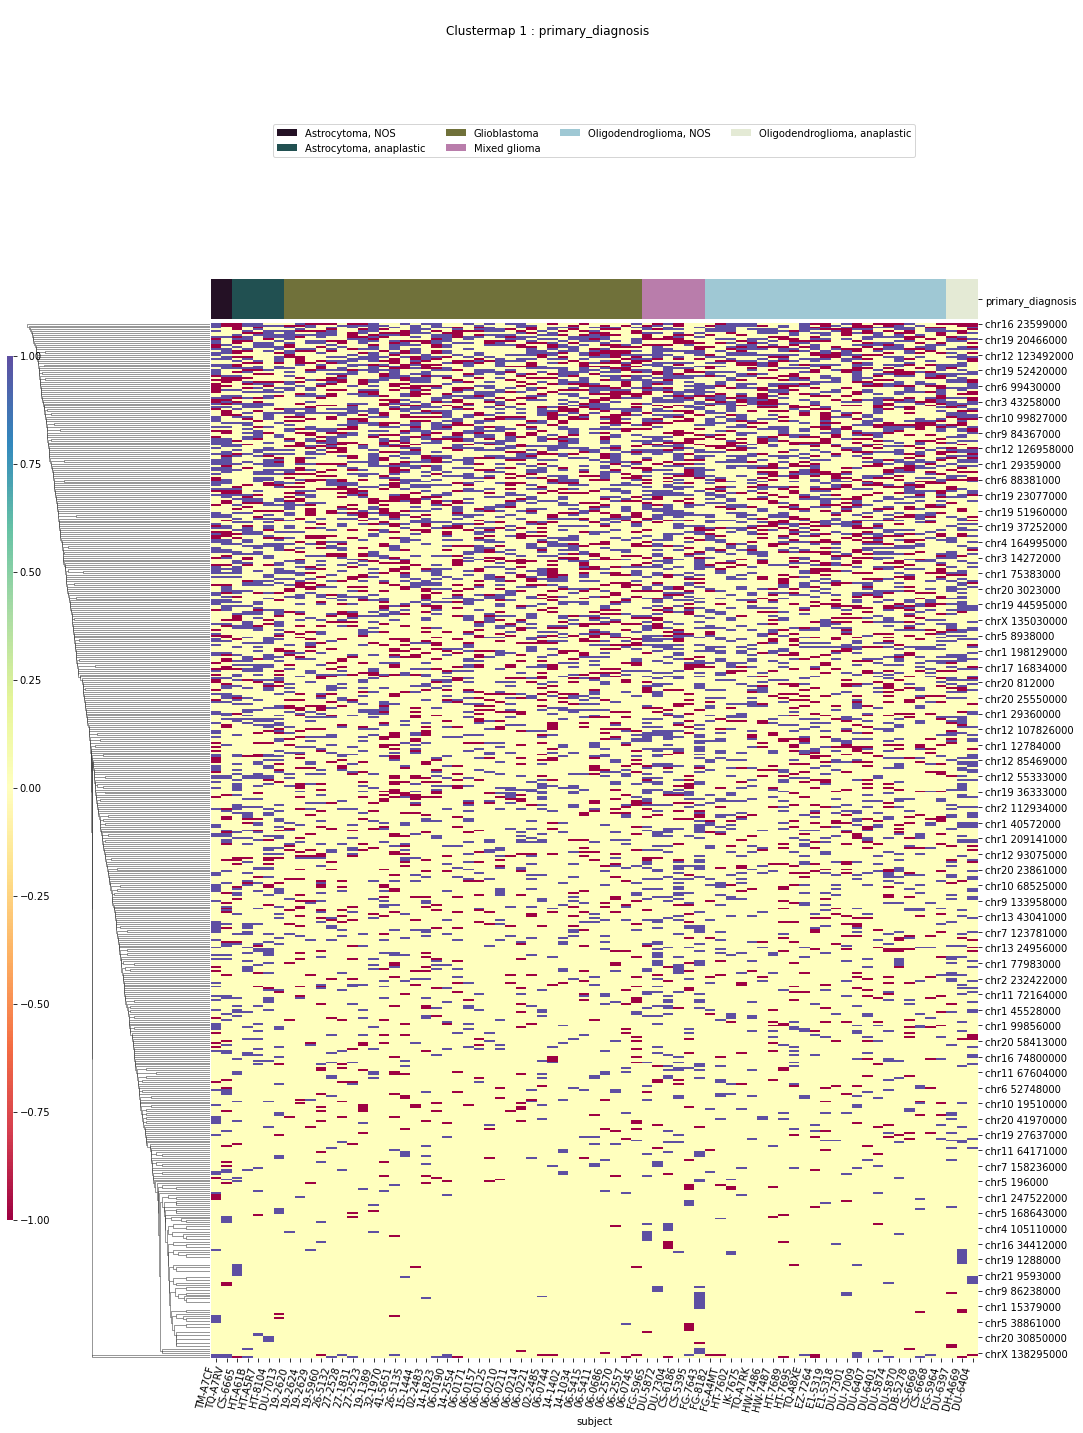

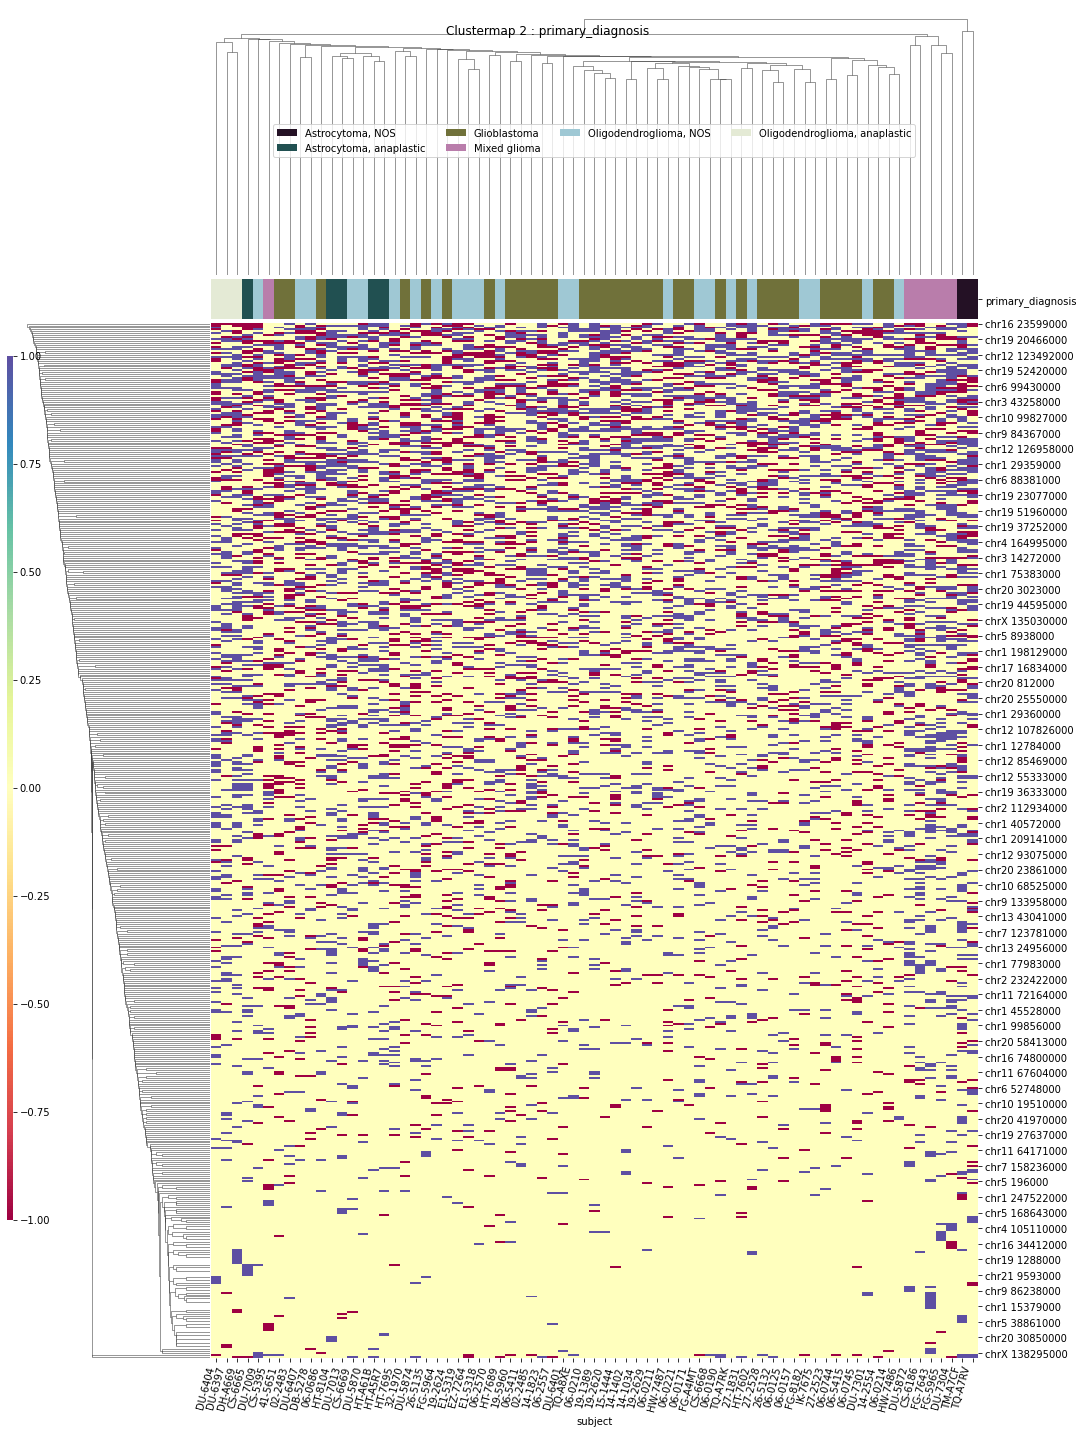

IDH
T-Testing
Boxplotting
Clustermapping
['IDH' 'chr1 144451000' 'chr1 156182000' 'chr1 165092000' 'chr1 198129000'
 'chr1 225966000' 'chr10 41714000' 'chr11 105264000' 'chr11 118721000'
 'chr11 17050000' 'chr11 44664000' 'chr11 62195000' 'chr12 58336000'
 'chr12 85469000' 'chr12 9601000' 'chr13 24592000' 'chr15 58834000'
 'chr15 75870000' 'chr16 83879000' 'chr17 44181000' 'chr17 59290000'
 'chr18 2001000' 'chr18 67076000' 'chr18 67077000' 'chr19 20083000'
 'chr19 36234000' 'chr19 37252000' 'chr19 37331000' 'chr19 37530000'
 'chr19 37630000' 'chr19 39479000' 'chr19 39688000' 'chr19 51905000'
 'chr2 214803000' 'chr2 227722000' 'chr2 228363000' 'chr2 27459000'
 'chr2 32870000' 'chr20 34223000' 'chr21 14280000' 'chr22 24211000'
 'chr3 189252000' 'chr3 23544000' 'chr3 23545000' 'chr3 38135000'
 'chr3 5081000' 'chr4 62940000' 'chr6 93173000' 'chr7 147801000'
 'chr7 151027000' 'chr7 4600000' 'chr7 6901000' 'chr8 143850000'
 'chr8 144231000' 'chr8 30118000' 'chr8 54126000' 'chr8 78438000'
 'c

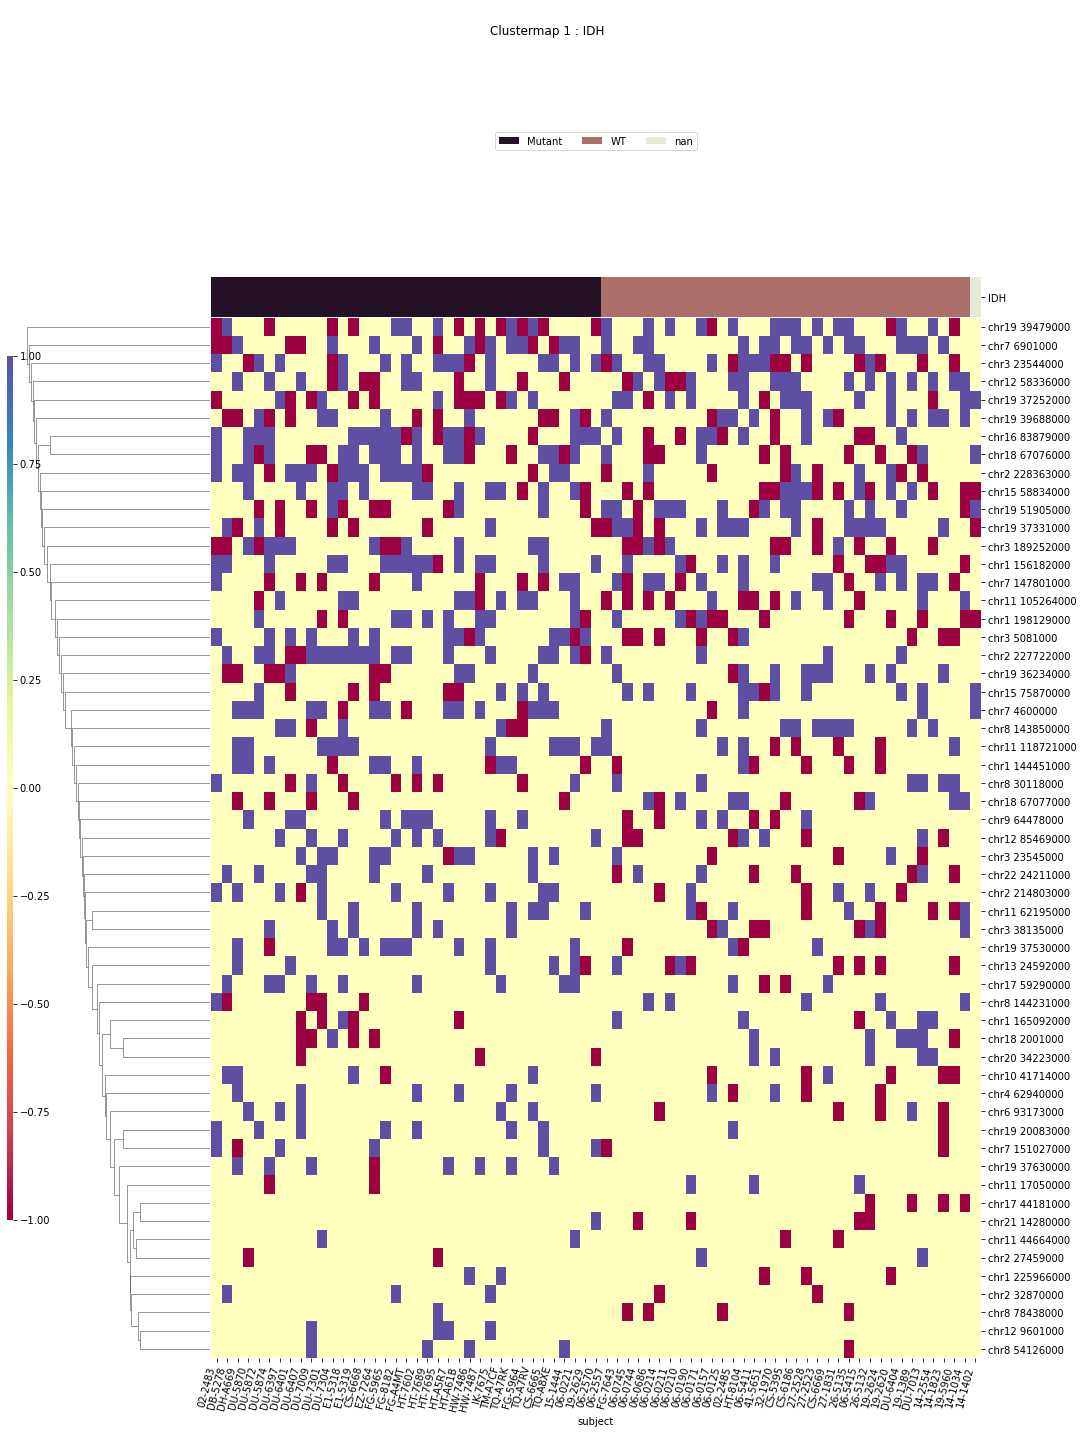

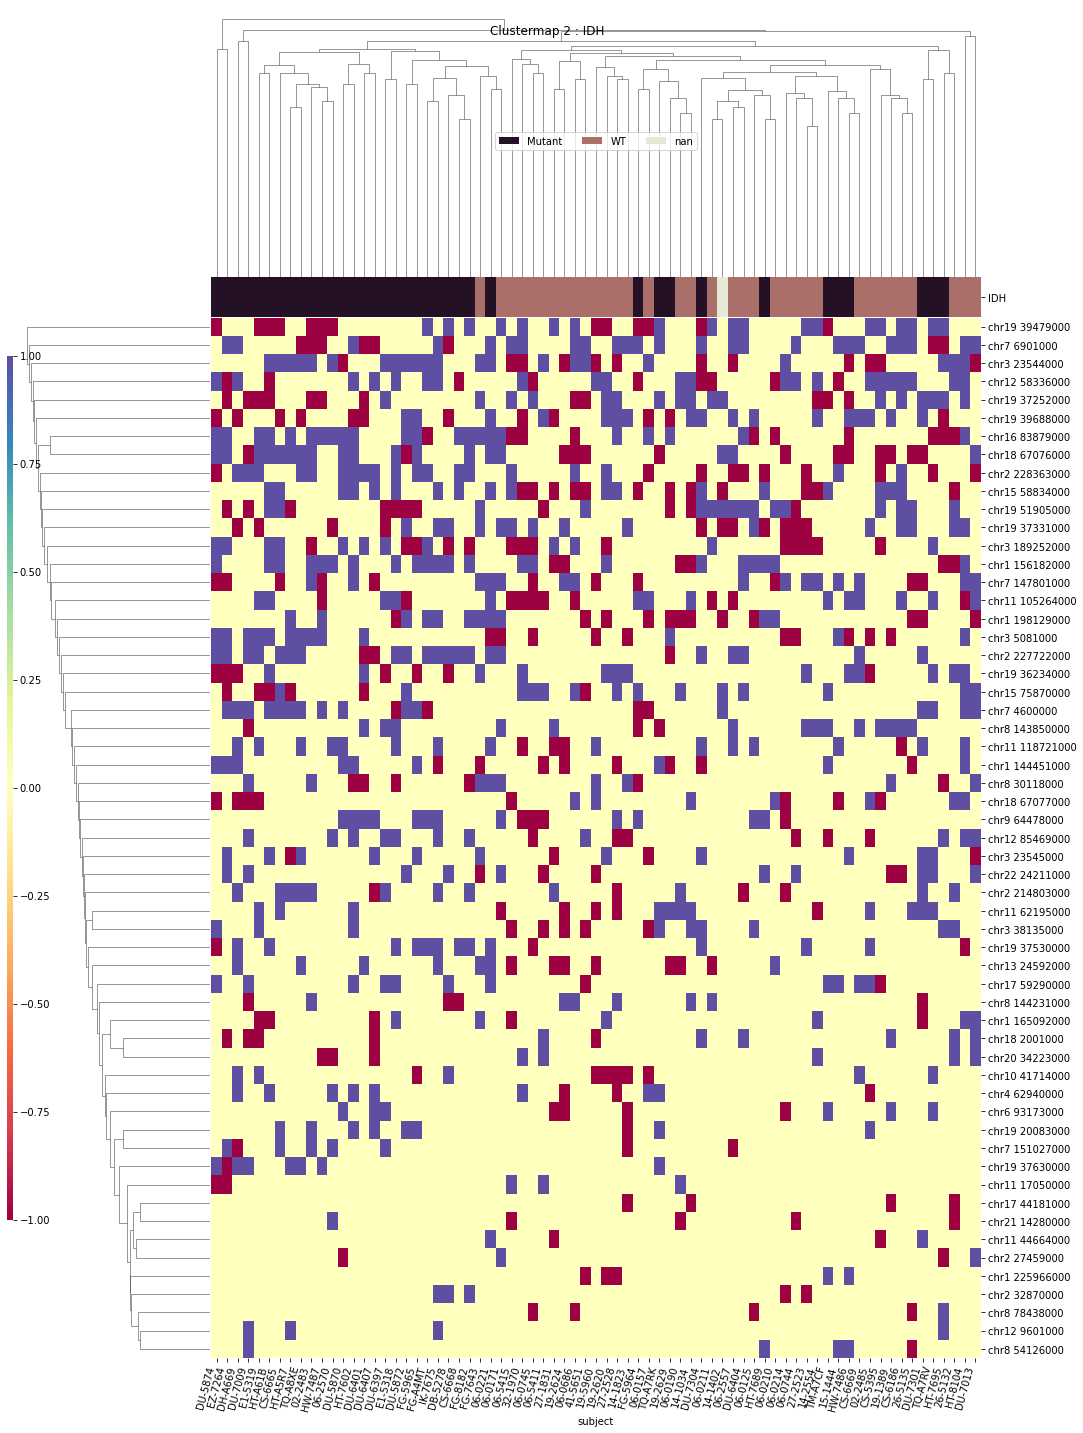

x1p19q
T-Testing
Boxplotting
Clustermapping
['chr1 104135000' 'chr1 109767000' 'chr1 112816000' 'chr1 113070000'
 'chr1 114058000' 'chr1 144451000' 'chr1 15136000' 'chr1 152797000'
 'chr1 155701000' 'chr1 20703000' 'chr1 211223000' 'chr1 212320000'
 'chr1 231128000' 'chr1 248906000' 'chr1 29360000' 'chr1 45513000'
 'chr1 45528000' 'chr1 46395000' 'chr1 54637000' 'chr1 65140000'
 'chr1 66592000' 'chr1 70461000' 'chr1 89066000' 'chr1 89067000'
 'chr10 100278000' 'chr10 1157000' 'chr10 29427000' 'chr10 41714000'
 'chr10 43338000' 'chr11 118330000' 'chr11 17050000' 'chr11 33049000'
 'chr11 60451000' 'chr11 9319000' 'chr12 118105000' 'chr12 123493000'
 'chr12 34180000' 'chr12 56783000' 'chr12 8461000' 'chr13 19780000'
 'chr13 49593000' 'chr14 105274000' 'chr14 87020000' 'chr15 96833000'
 'chr16 10829000' 'chr16 23599000' 'chr16 34999000' 'chr16 5755000'
 'chr17 27034000' 'chr17 28224000' 'chr17 30523000' 'chr17 30793000'
 'chr17 43355000' 'chr17 46238000' 'chr17 59290000' 'chr17 80551000'
 

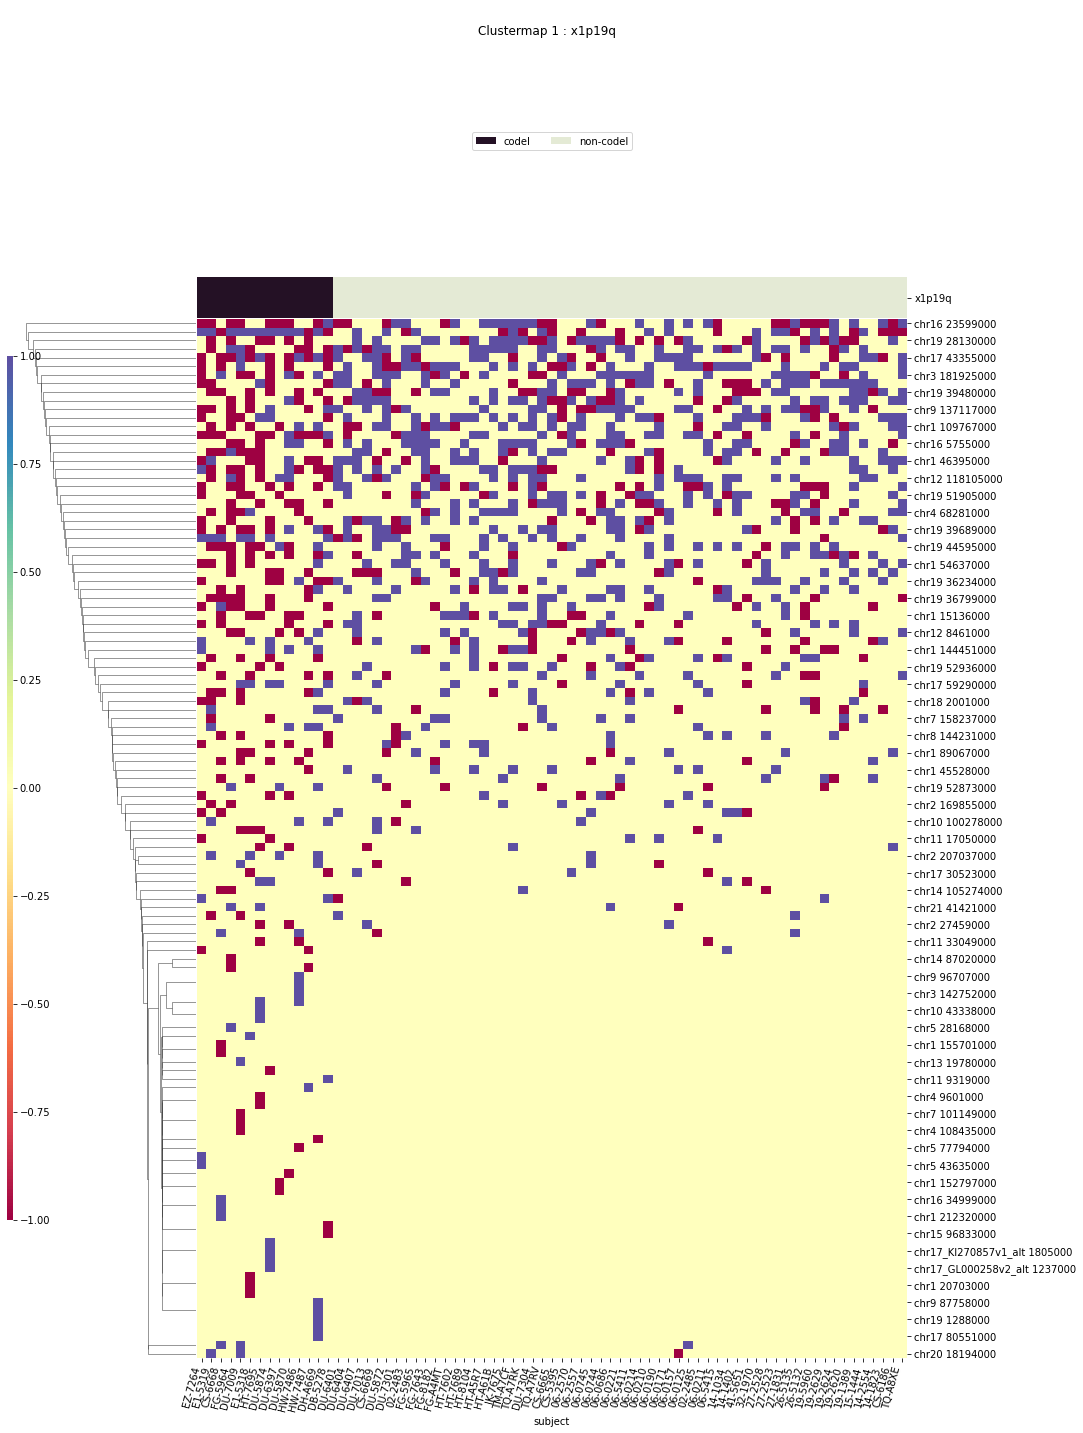

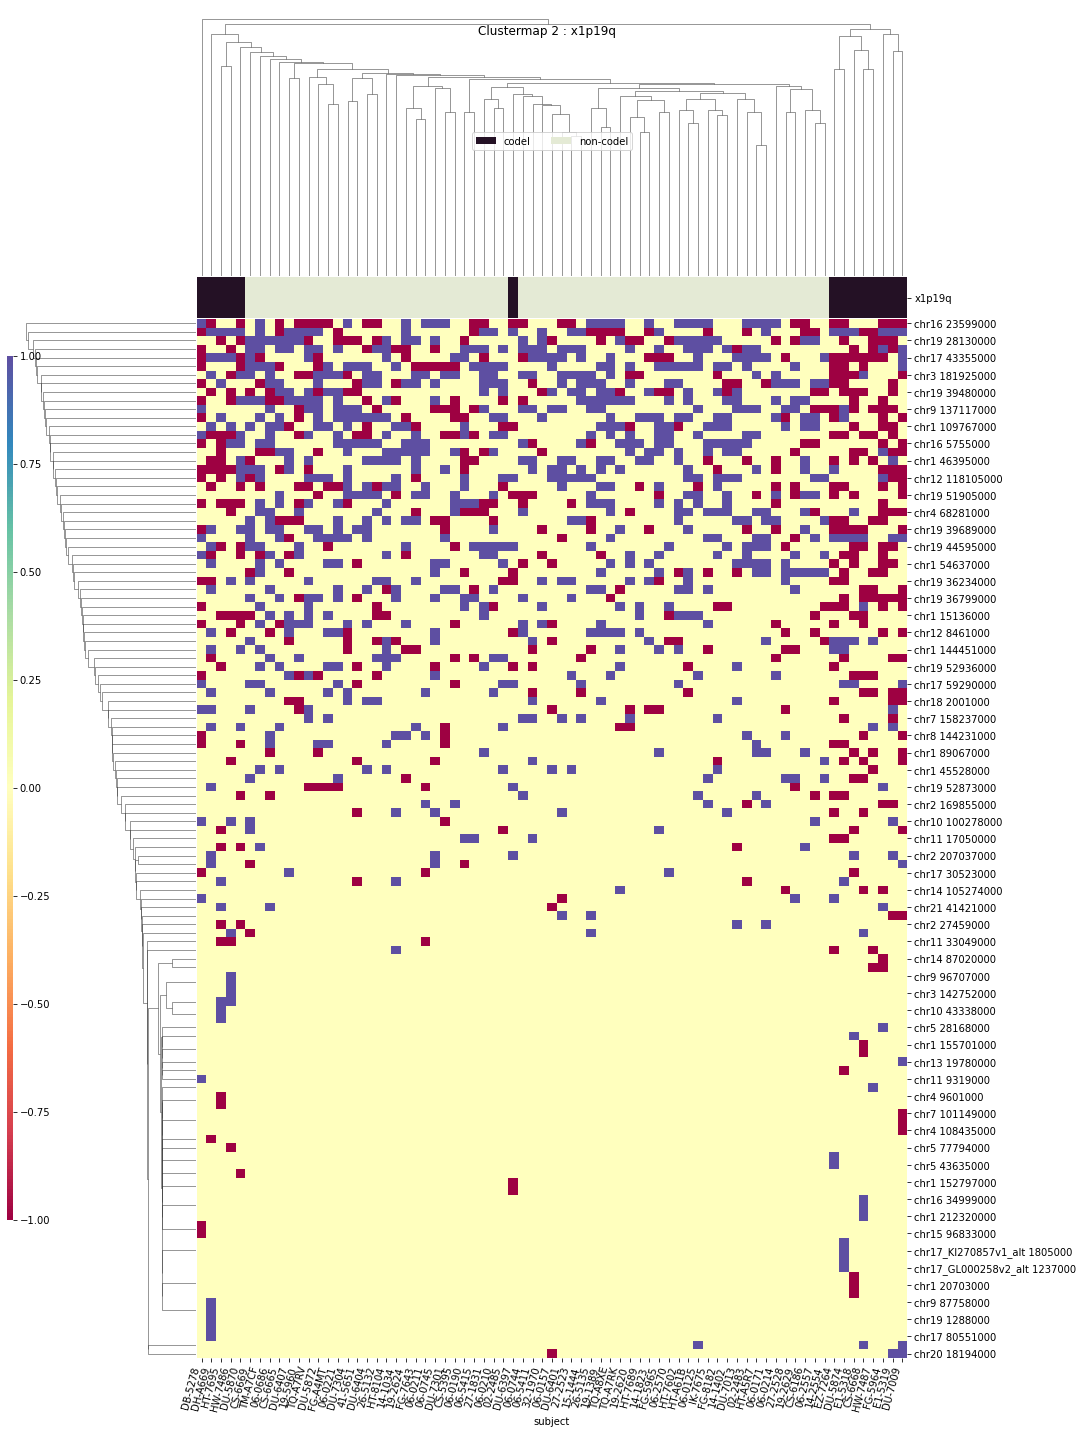

TERT
T-Testing
Boxplotting
Clustermapping
['TERT' 'chr1 147106000' 'chr1 15135000' 'chr1 15136000' 'chr1 156182000'
 'chr1 165092000' 'chr1 198129000' 'chr1 25587000' 'chr1 54637000'
 'chr1 75377000' 'chr10 26893000' 'chr10 29427000' 'chr10 37494000'
 'chr10 68525000' 'chr10 97416000' 'chr11 18901000' 'chr11 44664000'
 'chr11 62195000' 'chr12 126958000' 'chr12 34619000' 'chr14 38118000'
 'chr15 45292000' 'chr15 58834000' 'chr16 10829000' 'chr16 35955000'
 'chr16 5755000' 'chr19 11890000' 'chr19 20083000' 'chr19 20156000'
 'chr19 37530000' 'chr19 52698000' 'chr19 52750000' 'chr19 52873000'
 'chr19 53364000' 'chr19 55718000' 'chr2 234169000' 'chr2 32870000'
 'chr20 34223000' 'chr20 812000' 'chr3 100336000' 'chr3 132649000'
 'chr3 186886000' 'chr3 23544000' 'chr3 5081000' 'chr3 53977000'
 'chr3 75393000' 'chr4 160661000' 'chr4 162419000' 'chr4 188068000'
 'chr4 62940000' 'chr4 68281000' 'chr4 72130000' 'chr4 87746000'
 'chr5 109832000' 'chr5 43580000' 'chr6 151456000' 'chr6 2909000'
 'chr

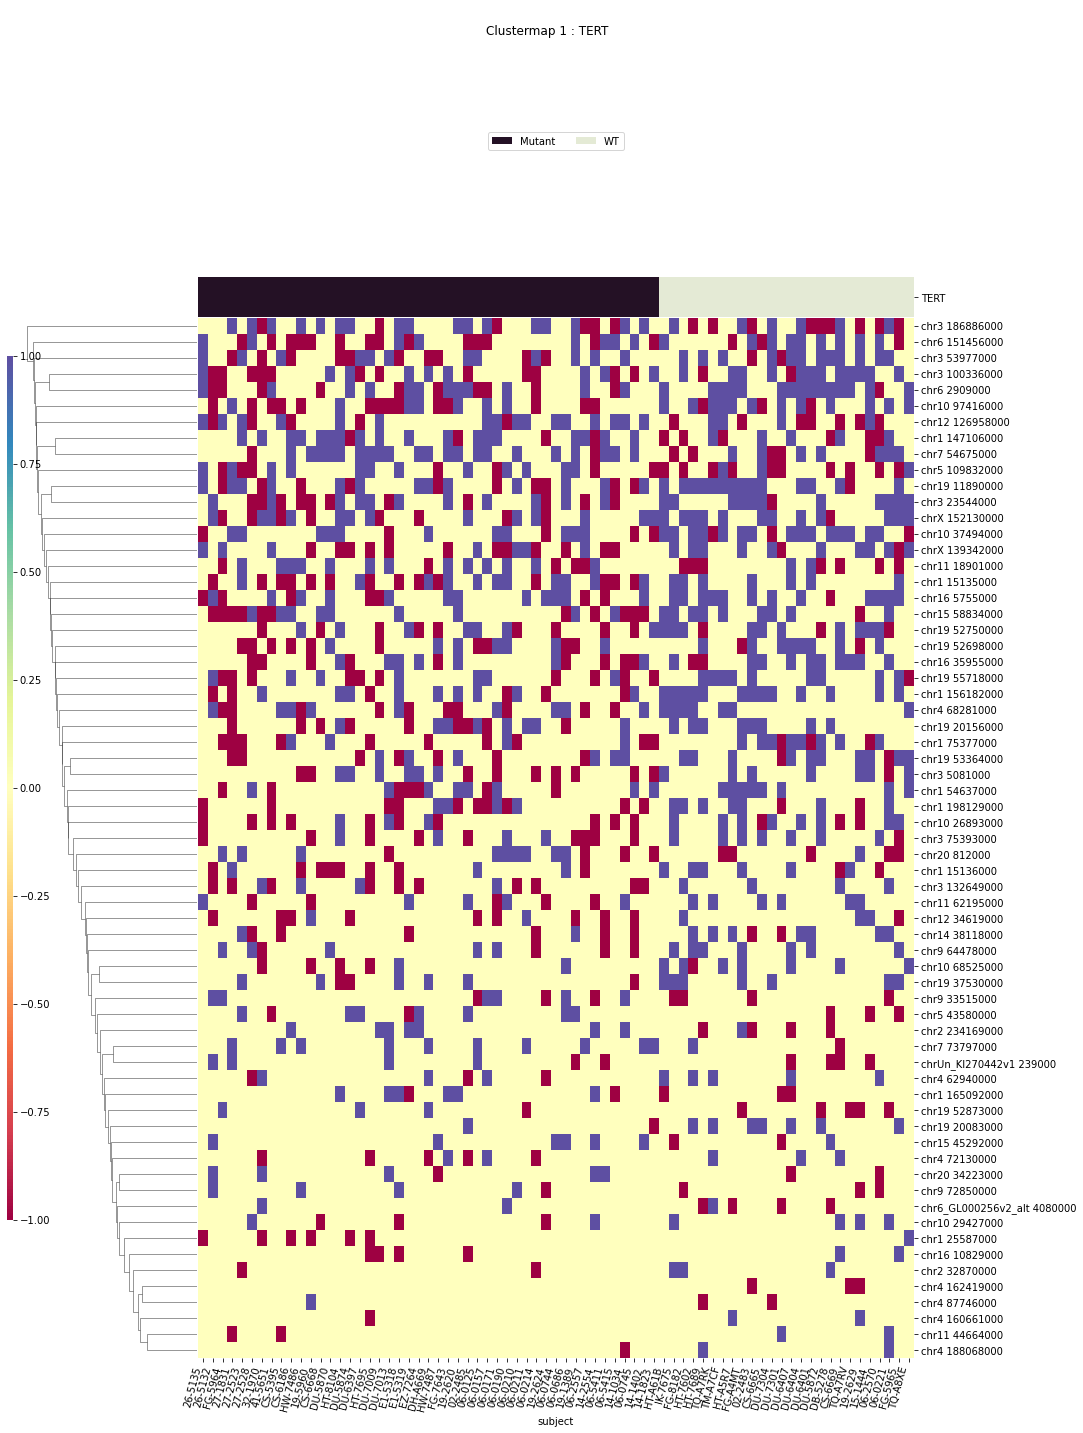

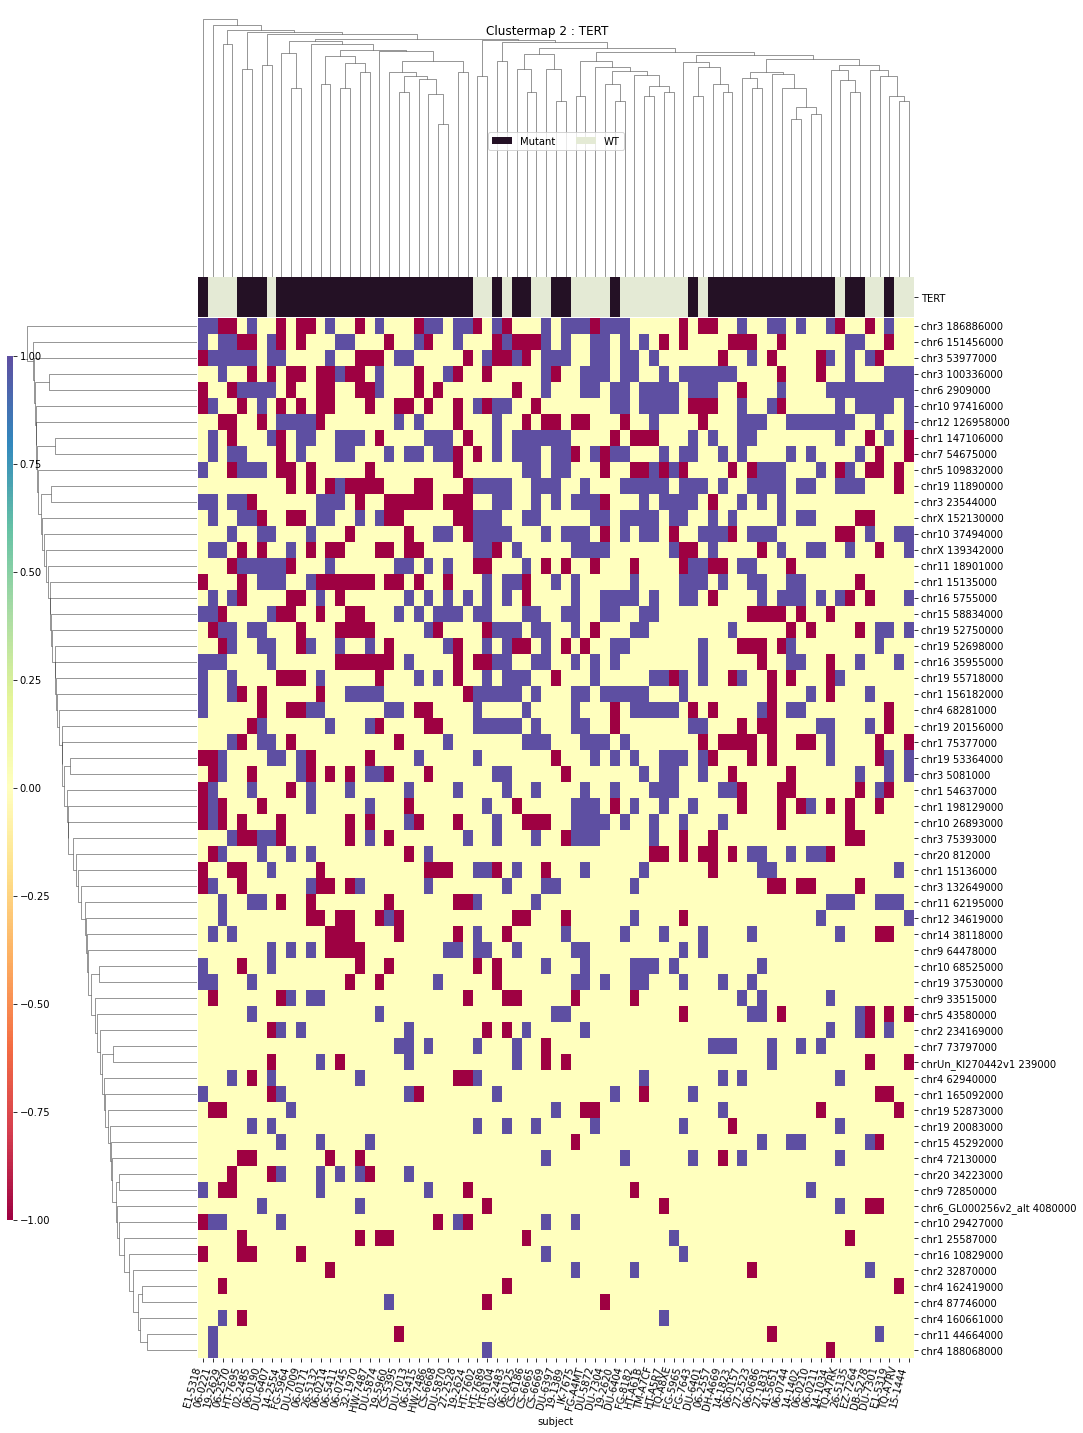

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 104135000' 'chr1 144451000' 'chr1 156182000' 'chr1 198129000'
 'chr1 213150000' 'chr1 225966000' 'chr1 227606000' 'chr1 99793000'
 'chr10 102391000' 'chr10 26893000' 'chr10 3061000' 'chr10 37493000'
 'chr10 41714000' 'chr10 6833000' 'chr10 99827000' 'chr11 10392000'
 'chr11 105264000' 'chr11 17050000' 'chr11 62383000' 'chr11 64171000'
 'chr11 71600000' 'chr12 105478000' 'chr12 105479000' 'chr12 37738000'
 'chr12 85469000' 'chr12 93075000' 'chr12 9600000' 'chr13 24592000'
 'chr13 34541000' 'chr13 43041000' 'chr13 78647000' 'chr14 64979000'
 'chr15 58834000' 'chr15 65733000' 'chr16 75816000' 'chr17 44181000'
 'chr18 31810000' 'chr19 27814000' 'chr19 37630000' 'chr19 44595000'
 'chr19 52420000' 'chr19 52789000' 'chr19 52944000' 'chr19 53444000'
 'chr2 105426000' 'chr2 227722000' 'chr2 32870000' 'chr20 3023000'
 'chr20 34252000' 'chr20 37070000' 'chr3 100336000' 'chr3 189252000'
 'chr3 23545000' 'chr3 38135000' 'chr3 5081000' 'chr4 1

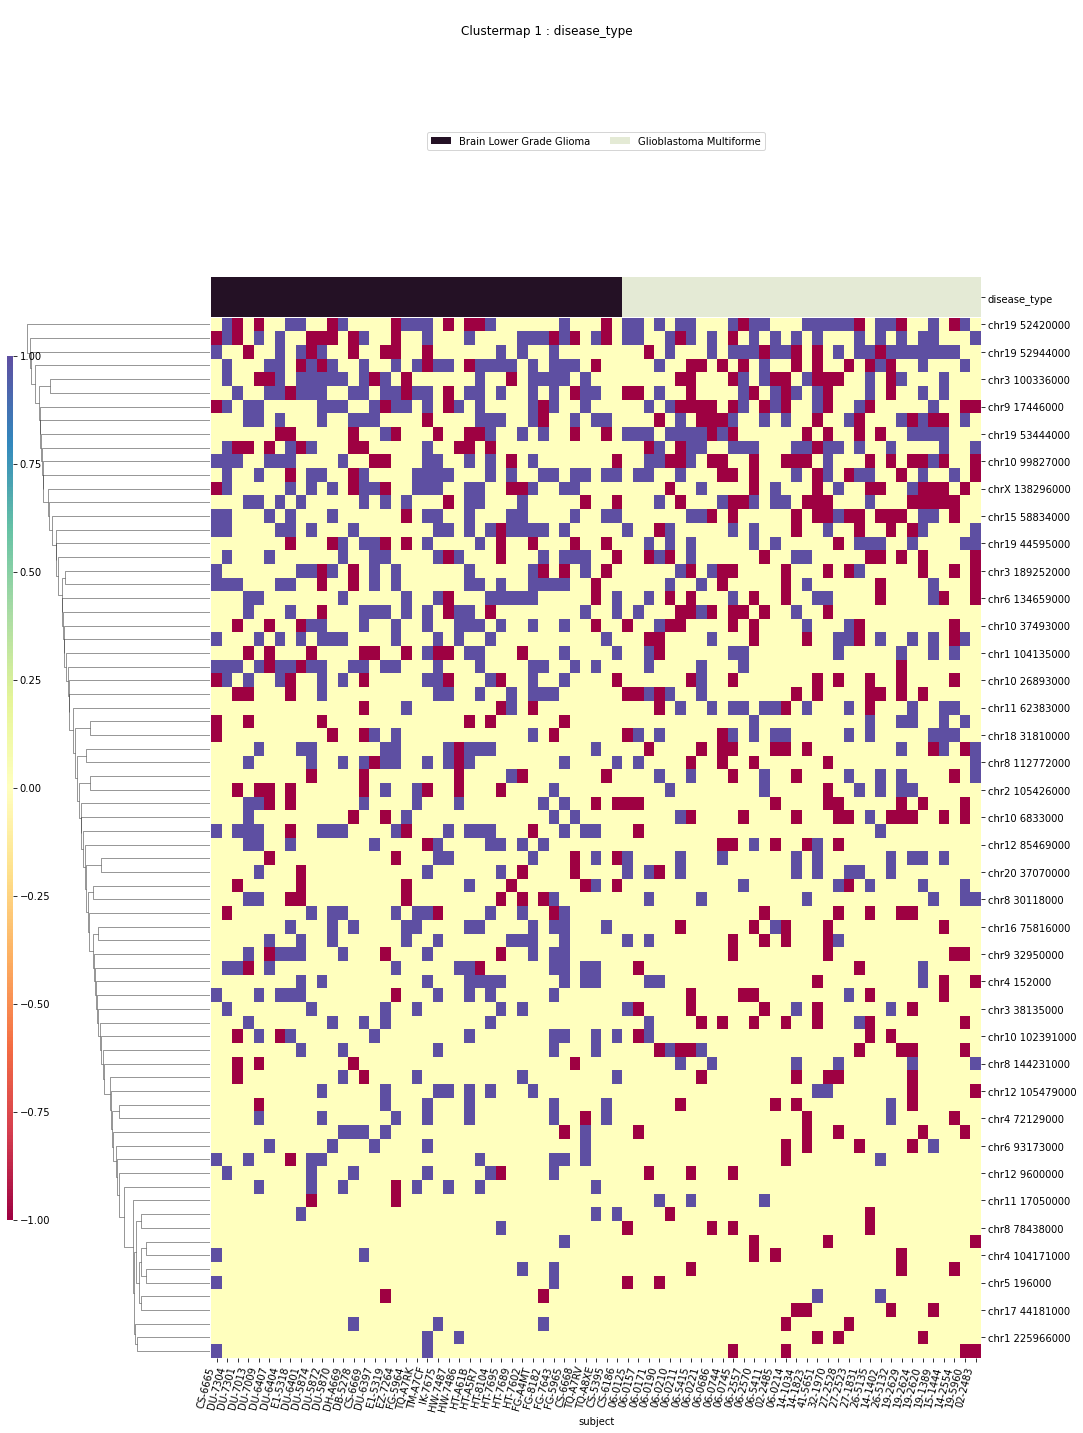

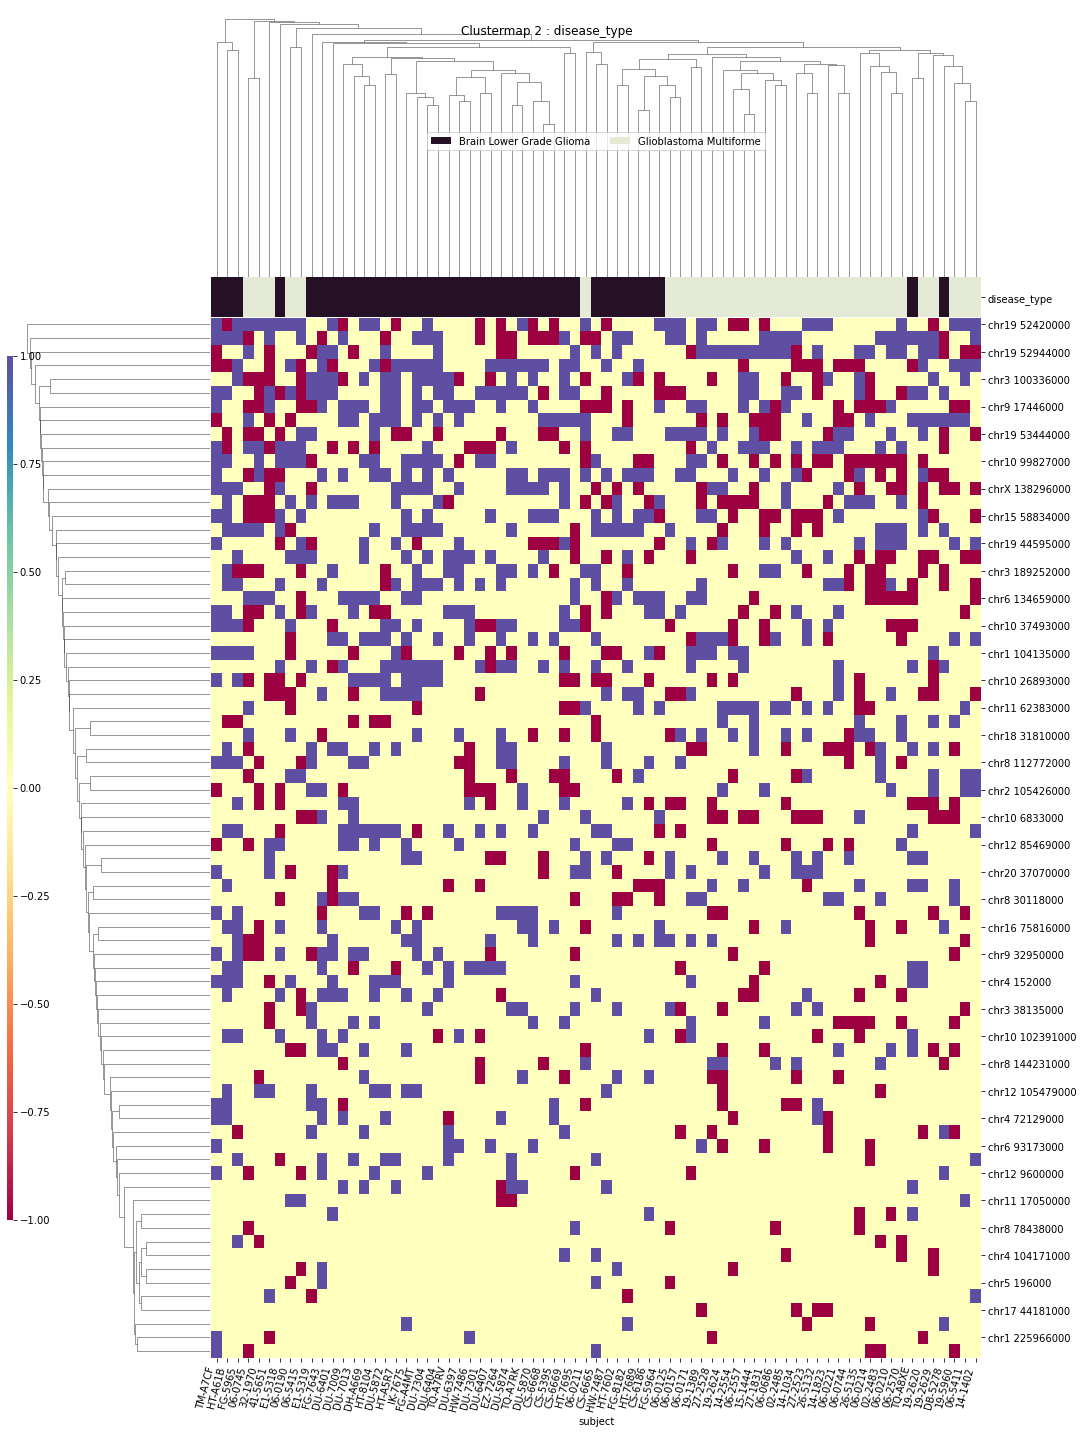

IDH_1p19q_status
T-Testing


/Users/jake/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jake/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Boxplotting
Clustermapping
['IDH_1p19q_status' 'chr1 104135000' 'chr1 10427000' 'chr1 109767000'
 'chr1 114058000' 'chr1 12784000' 'chr1 144451000' 'chr1 15135000'
 'chr1 15136000' 'chr1 156182000' 'chr1 161413000' 'chr1 165092000'
 'chr1 198129000' 'chr1 247582000' 'chr1 25587000' 'chr1 29360000'
 'chr1 45513000' 'chr1 45528000' 'chr1 54637000' 'chr1 65140000'
 'chr1 66592000' 'chr1 70461000' 'chr1 89066000' 'chr1 89067000'
 'chr10 100278000' 'chr10 26893000' 'chr10 29427000' 'chr10 37493000'
 'chr10 41714000' 'chr10 47396000' 'chr10 68525000' 'chr10 97416000'
 'chr11 118721000' 'chr11 17050000' 'chr11 18901000' 'chr11 24447000'
 'chr11 44664000' 'chr11 5961000' 'chr11 60451000' 'chr11 62195000'
 'chr11 79192000' 'chr12 118105000' 'chr12 123493000' 'chr12 34180000'
 'chr12 34619000' 'chr12 37738000' 'chr12 8461000' 'chr12 85469000'
 'chr12 93075000' 'chr12 9601000' 'chr13 54267000' 'chr13 98765000'
 'chr15 45292000' 'chr15 58834000' 'chr16 10829000' 'chr16 23599000'
 'chr16 2928000' '

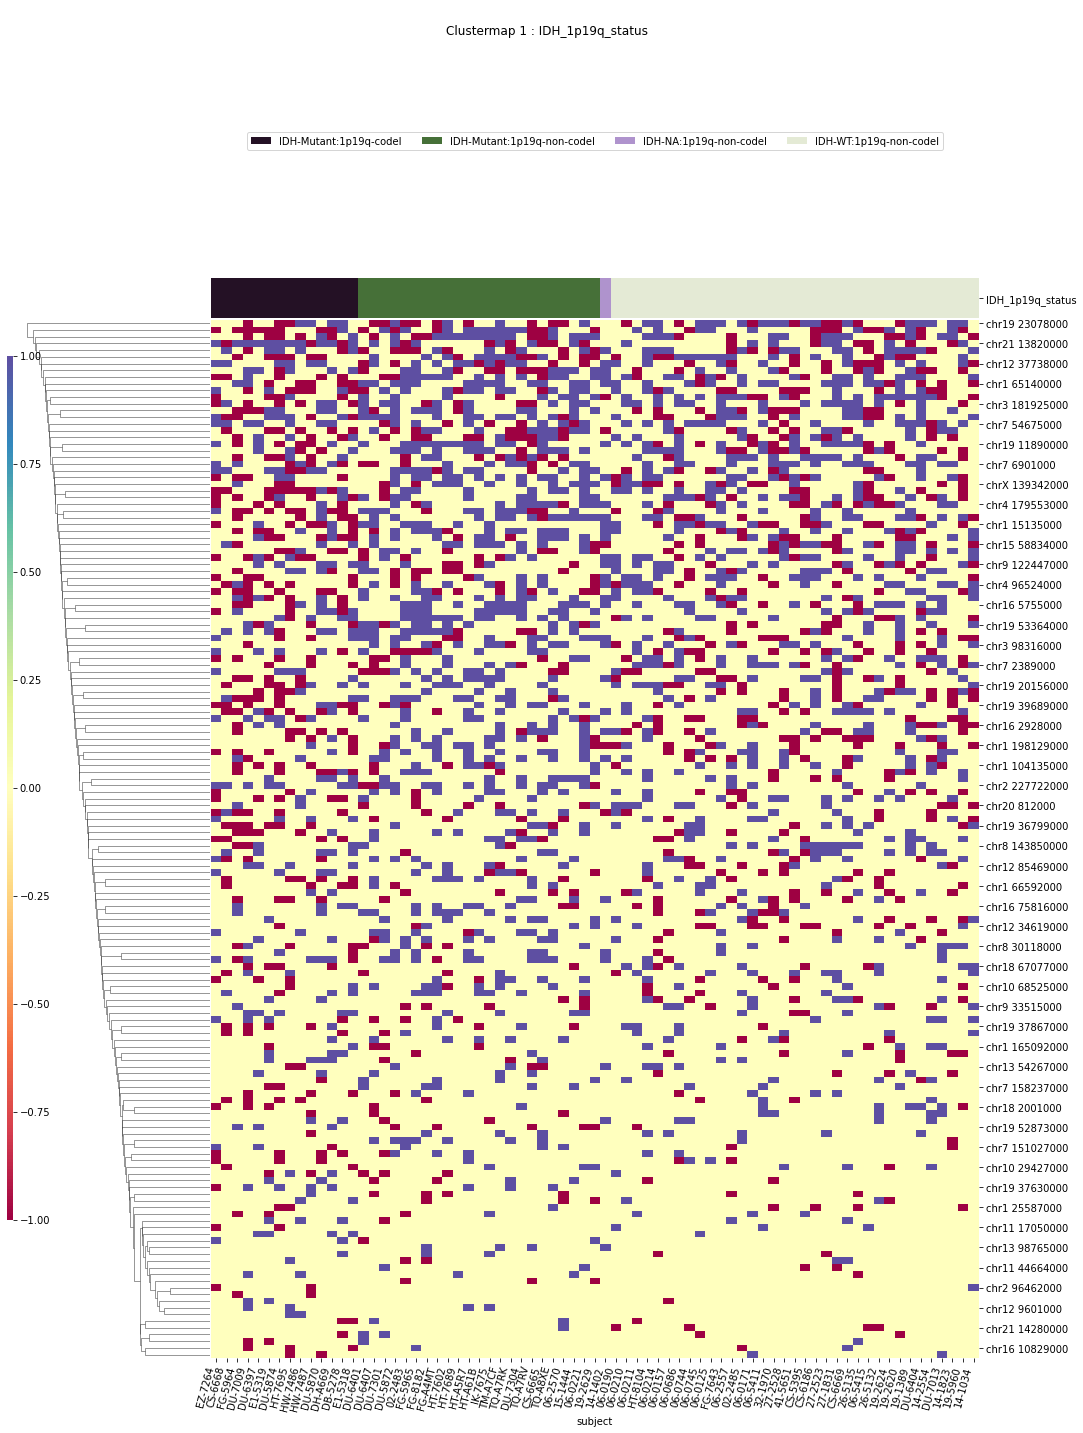

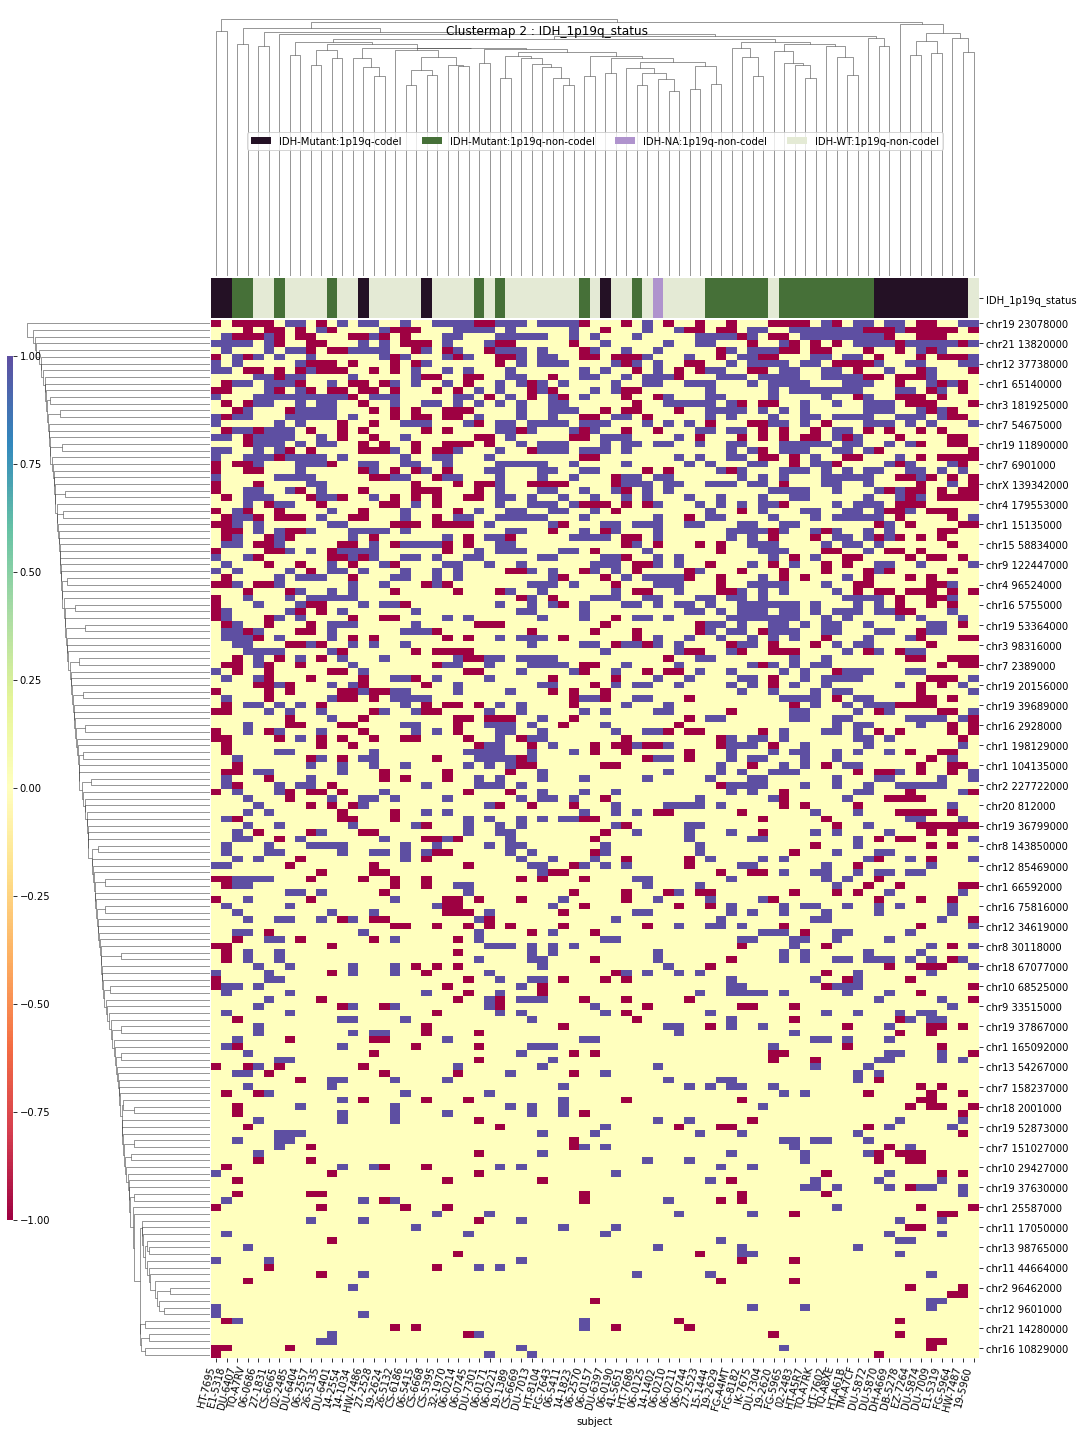

WHO_groups
T-Testing
Boxplotting
Clustermapping
['WHO_groups' 'chr1 104134000' 'chr1 104135000' 'chr1 10425000'
 'chr1 109767000' 'chr1 112898000' 'chr1 114058000' 'chr1 13353000'
 'chr1 144451000' 'chr1 145415000' 'chr1 145932000' 'chr1 146907000'
 'chr1 147106000' 'chr1 147733000' 'chr1 147734000' 'chr1 148138000'
 'chr1 149093000' 'chr1 150632000' 'chr1 150635000' 'chr1 15135000'
 'chr1 15136000' 'chr1 152455000' 'chr1 15379000' 'chr1 155626000'
 'chr1 155635000' 'chr1 156182000' 'chr1 1580000' 'chr1 159768000'
 'chr1 160652000' 'chr1 160690000' 'chr1 160913000' 'chr1 160946000'
 'chr1 161315000' 'chr1 161413000' 'chr1 165092000' 'chr1 165093000'
 'chr1 179418000' 'chr1 188752000' 'chr1 198129000' 'chr1 209142000'
 'chr1 211971000' 'chr1 213150000' 'chr1 21389000' 'chr1 224339000'
 'chr1 224340000' 'chr1 225966000' 'chr1 227606000' 'chr1 227869000'
 'chr1 236428000' 'chr1 241415000' 'chr1 247522000' 'chr1 25587000'
 'chr1 26819000' 'chr1 27220000' 'chr1 29338000' 'chr1 29359000'
 'c

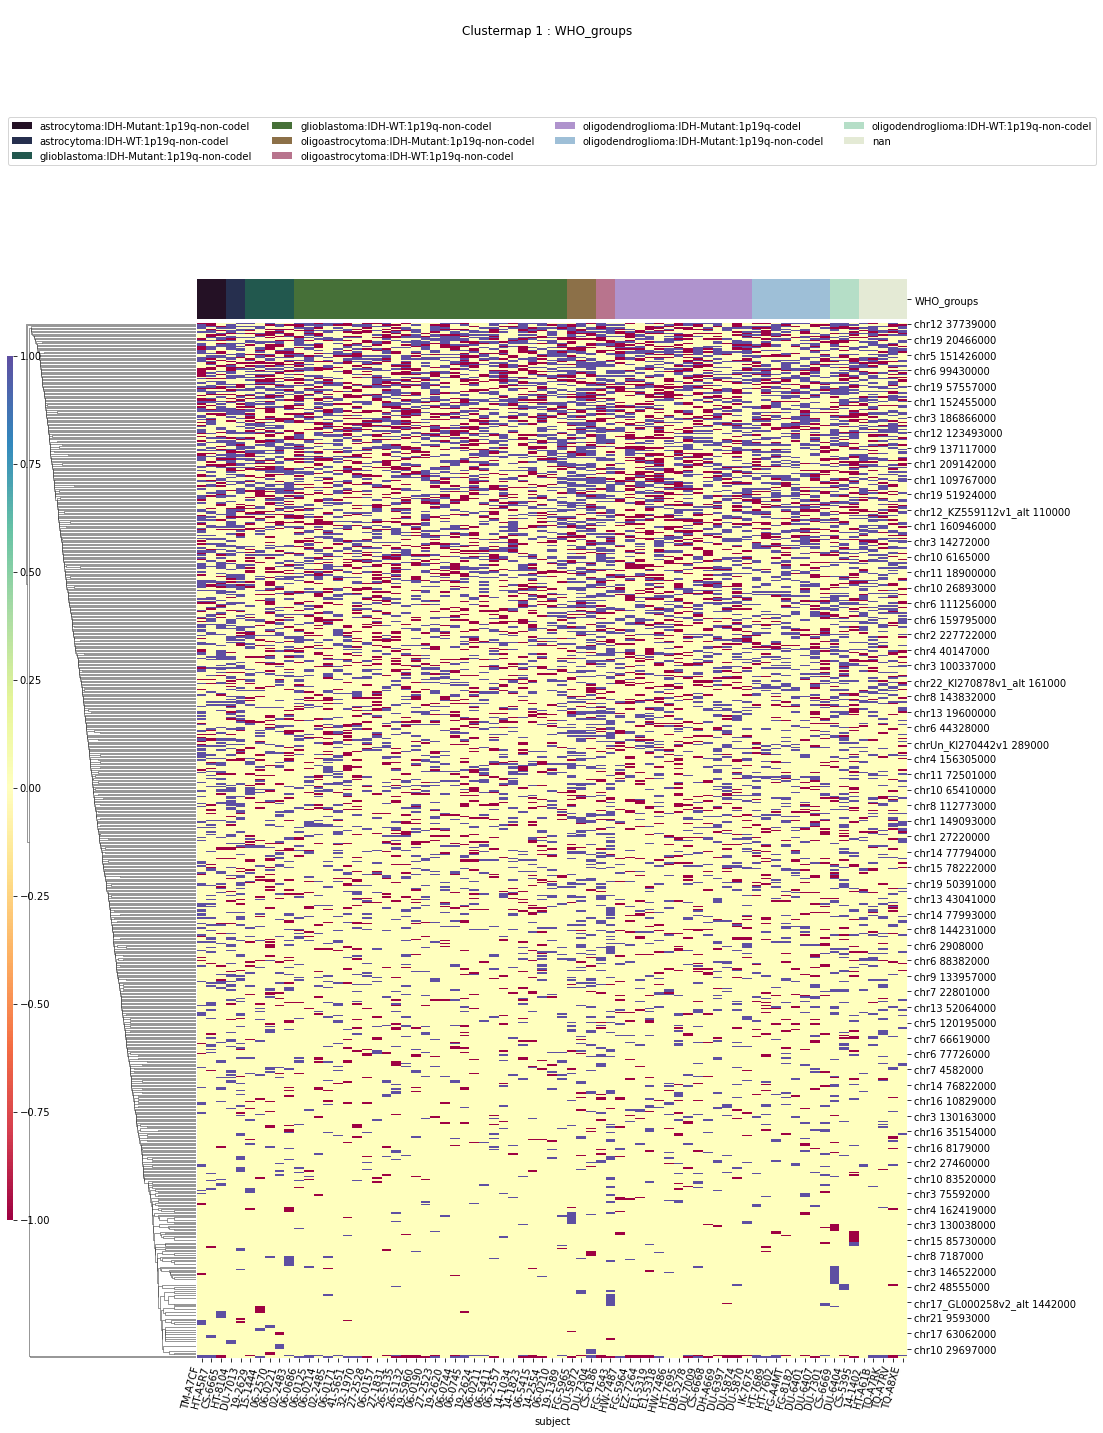

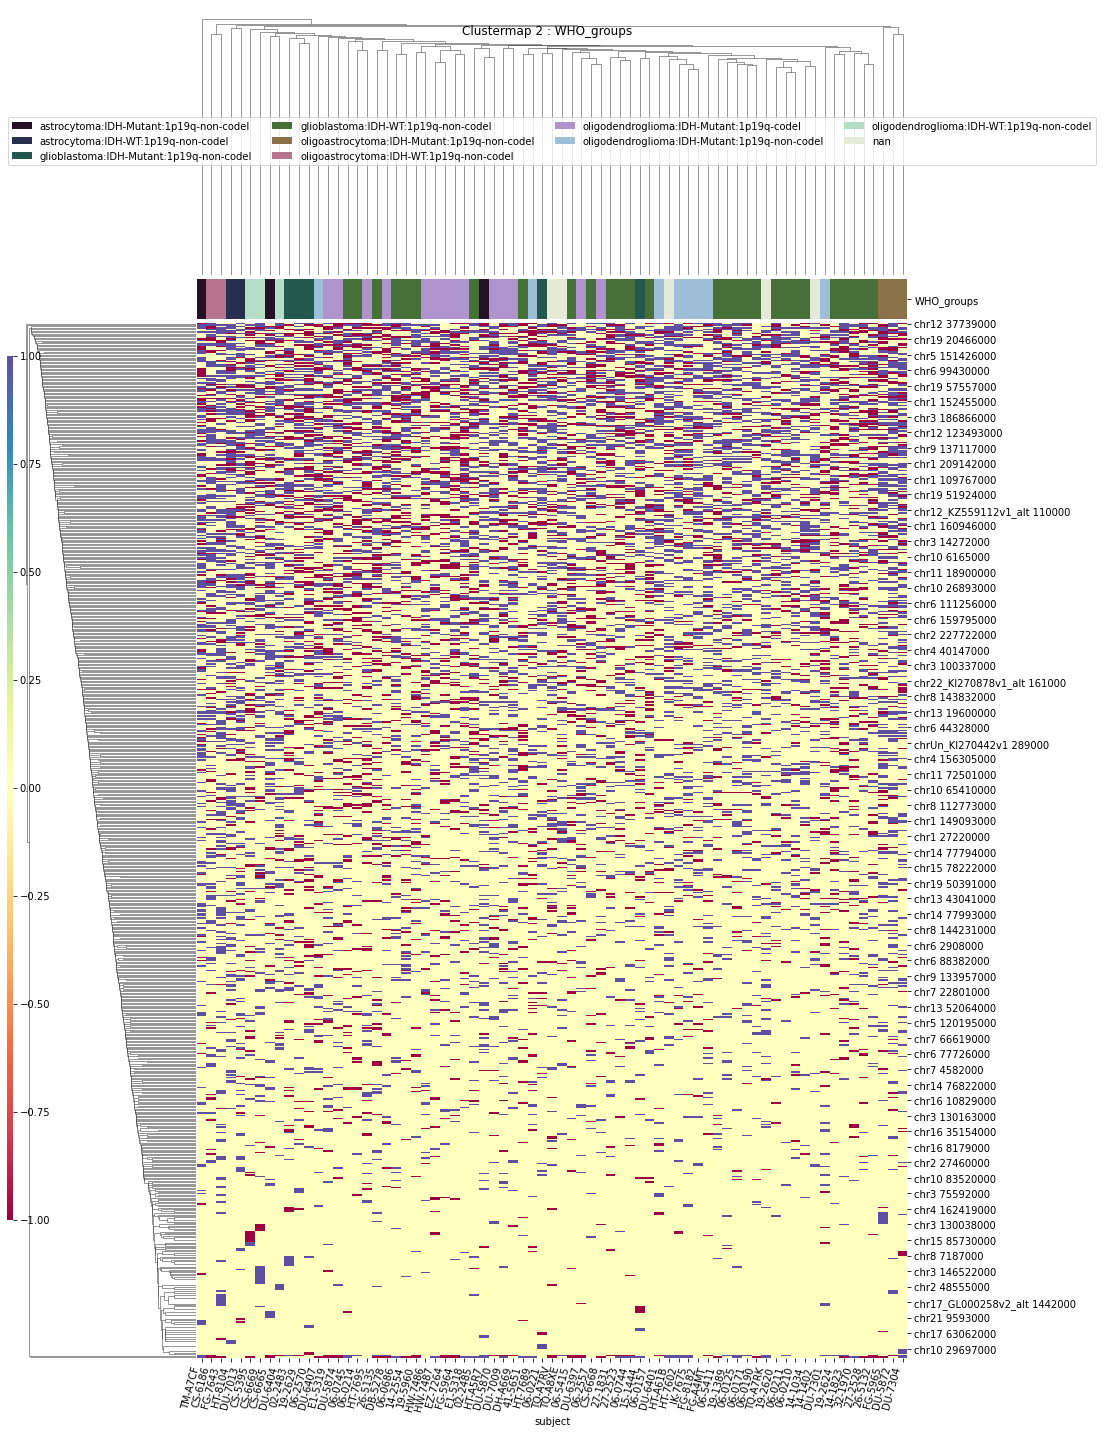

Triple_group
T-Testing
Boxplotting
Clustermapping
['Triple_group' 'chr1 104134000' 'chr1 104135000' 'chr1 10427000'
 'chr1 109767000' 'chr1 114058000' 'chr1 114059000' 'chr1 120424000'
 'chr1 12784000' 'chr1 144451000' 'chr1 147734000' 'chr1 148138000'
 'chr1 15135000' 'chr1 15136000' 'chr1 155635000' 'chr1 156182000'
 'chr1 160652000' 'chr1 161413000' 'chr1 165092000' 'chr1 198129000'
 'chr1 211971000' 'chr1 21389000' 'chr1 236428000' 'chr1 241415000'
 'chr1 247582000' 'chr1 25587000' 'chr1 26819000' 'chr1 29360000'
 'chr1 45513000' 'chr1 45528000' 'chr1 46395000' 'chr1 54636000'
 'chr1 54637000' 'chr1 65139000' 'chr1 65140000' 'chr1 66592000'
 'chr1 70461000' 'chr1 75377000' 'chr1 89066000' 'chr1 89067000'
 'chr1 99836000' 'chr1 99856000' 'chr10 100278000' 'chr10 103130000'
 'chr10 19510000' 'chr10 26893000' 'chr10 29427000' 'chr10 37493000'
 'chr10 37494000' 'chr10 41714000' 'chr10 47396000' 'chr10 68525000'
 'chr10 6992000' 'chr10 73715000' 'chr10 97416000' 'chr11 105264000'
 'chr1

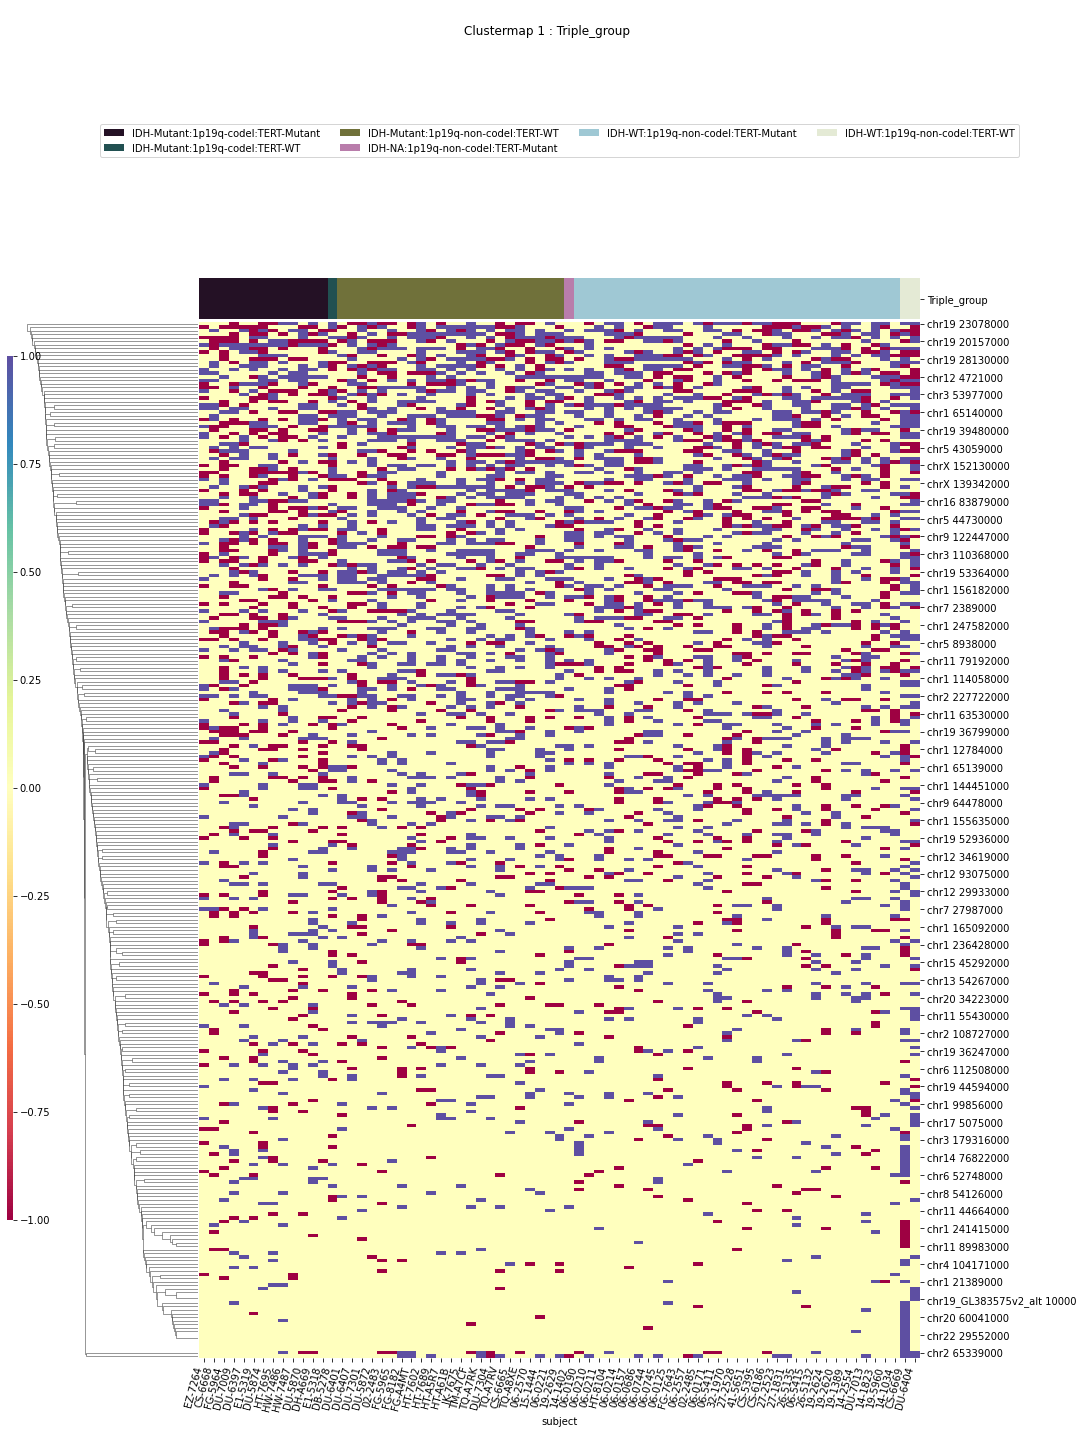

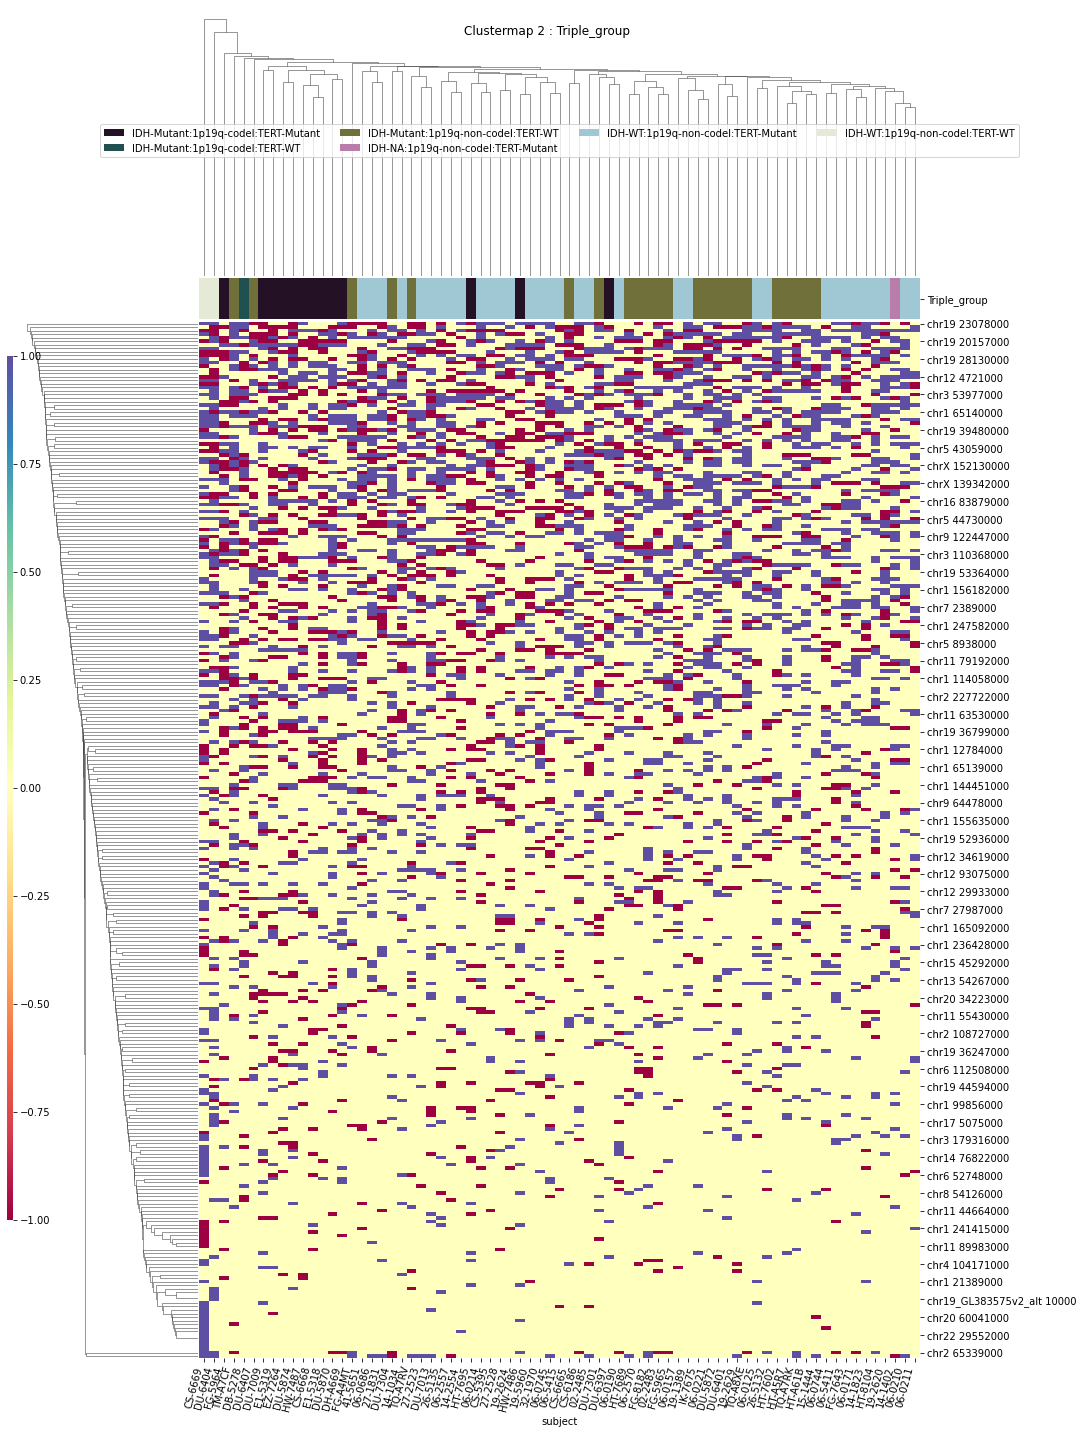

MGMT
T-Testing
Boxplotting
Clustermapping
['MGMT' 'chr1 15135000' 'chr1 160652000' 'chr1 160690000' 'chr1 224340000'
 'chr1 45529000' 'chr1 99793000' 'chr10 125940000' 'chr10 133541000'
 'chr11 10391000' 'chr11 118721000' 'chr11 17050000' 'chr11 25541000'
 'chr11 44664000' 'chr11 66588000' 'chr11 67758000' 'chr11 79192000'
 'chr12 107826000' 'chr12 110866000' 'chr12 37739000' 'chr12 4721000'
 'chr12 58336000' 'chr12 6885000' 'chr13 24592000' 'chr13 69614000'
 'chr14 20084000' 'chr14 88024000' 'chr15 75870000' 'chr16 30170000'
 'chr16 74800000' 'chr17_KI270908v1_alt 940000' 'chr18 31811000'
 'chr18 41184000' 'chr18 4918000' 'chr19 21567000' 'chr19 23078000'
 'chr19 23277000' 'chr19 39479000' 'chr2 192542000' 'chr2 231577000'
 'chr20 34223000' 'chr20 63659000' 'chr21 17933000' 'chr22 24211000'
 'chr3 120414000' 'chr3 183171000' 'chr3 23544000' 'chr3 23545000'
 'chr3 38135000' 'chr3 39418000' 'chr4 164905000' 'chr6 157752000'
 'chr6 93174000' 'chr7 147801000' 'chr7 2269000' 'chr7 2390000'

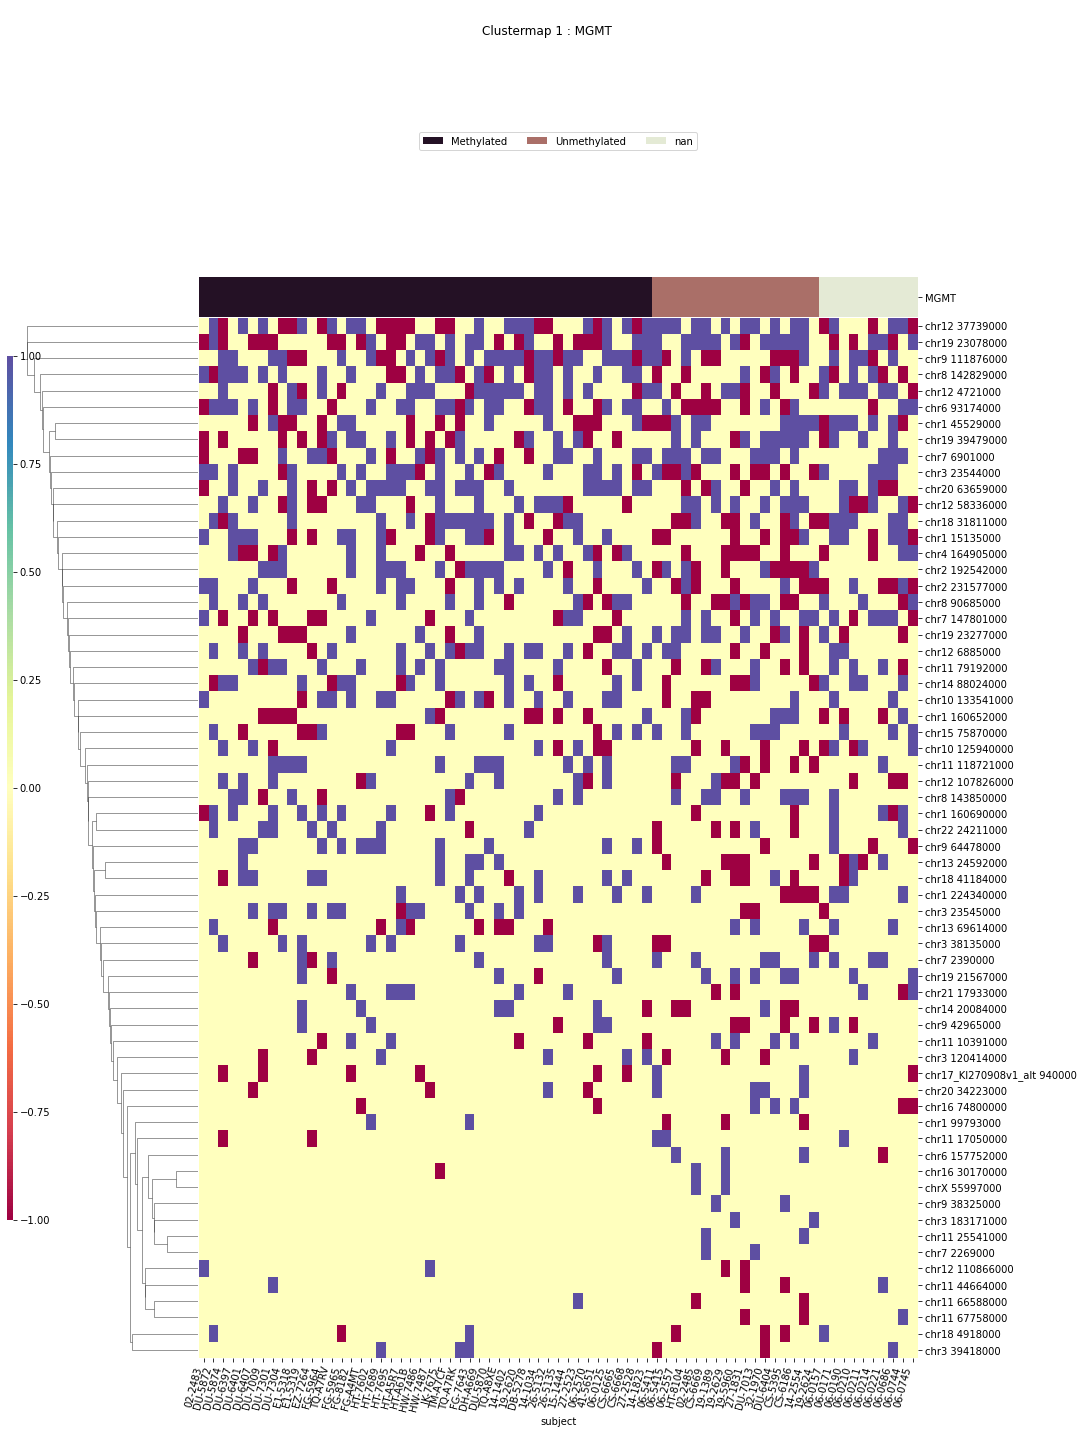

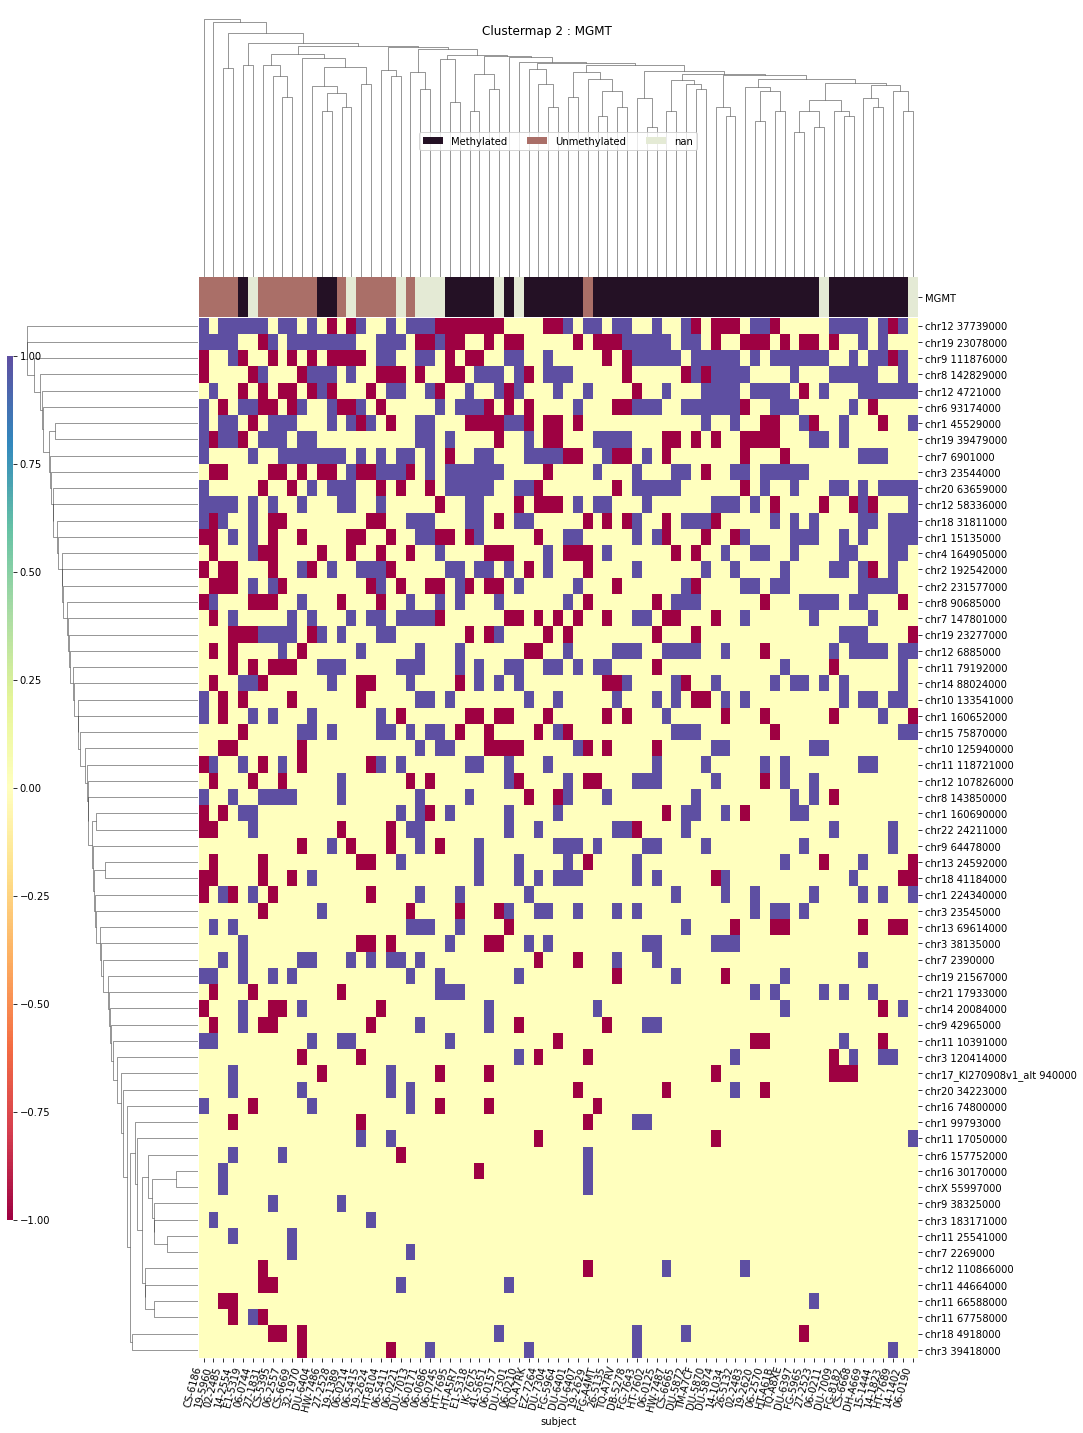

gender1
T-Testing
Boxplotting
Clustermapping
['chr1 149093000' 'chr1 159768000' 'chr1 21389000' 'chr1 247582000'
 'chr1 248906000' 'chr1 27220000' 'chr1 29339000' 'chr1 52006000'
 'chr1 99856000' 'chr10 104785000' 'chr10 41713000' 'chr10 6165000'
 'chr10 68526000' 'chr11 17050000' 'chr11 67867000' 'chr12 111722000'
 'chr12 42329000' 'chr13 24592000' 'chr14 64979000' 'chr17 64930000'
 'chr18 2001000' 'chr18 41184000' 'chr19 11890000' 'chr19 40823000'
 'chr19 51958000' 'chr19 52932000' 'chr19 53364000' 'chr2 208199000'
 'chr2 27459000' 'chr2 3104000' 'chr20 25550000' 'chr20 812000'
 'chr21 13819000' 'chr21 14280000' 'chr22 26772000' 'chr3 100336000'
 'chr3 14272000' 'chr3 186894000' 'chr3 23544000' 'chr3 5081000'
 'chr4 164906000' 'chr5 150453000' 'chr5 59463000' 'chr6 120931000'
 'chr6 27596000' 'chr6 52922000' 'chr7 126168000' 'chr7 126169000'
 'chr7 139467000' 'chr7 140552000' 'chr7 150199000' 'chr7 54675000'
 'chr8 143288000' 'chr8 47176000' 'chr9 134092000' 'chrX 123680000'
 'chrX 1

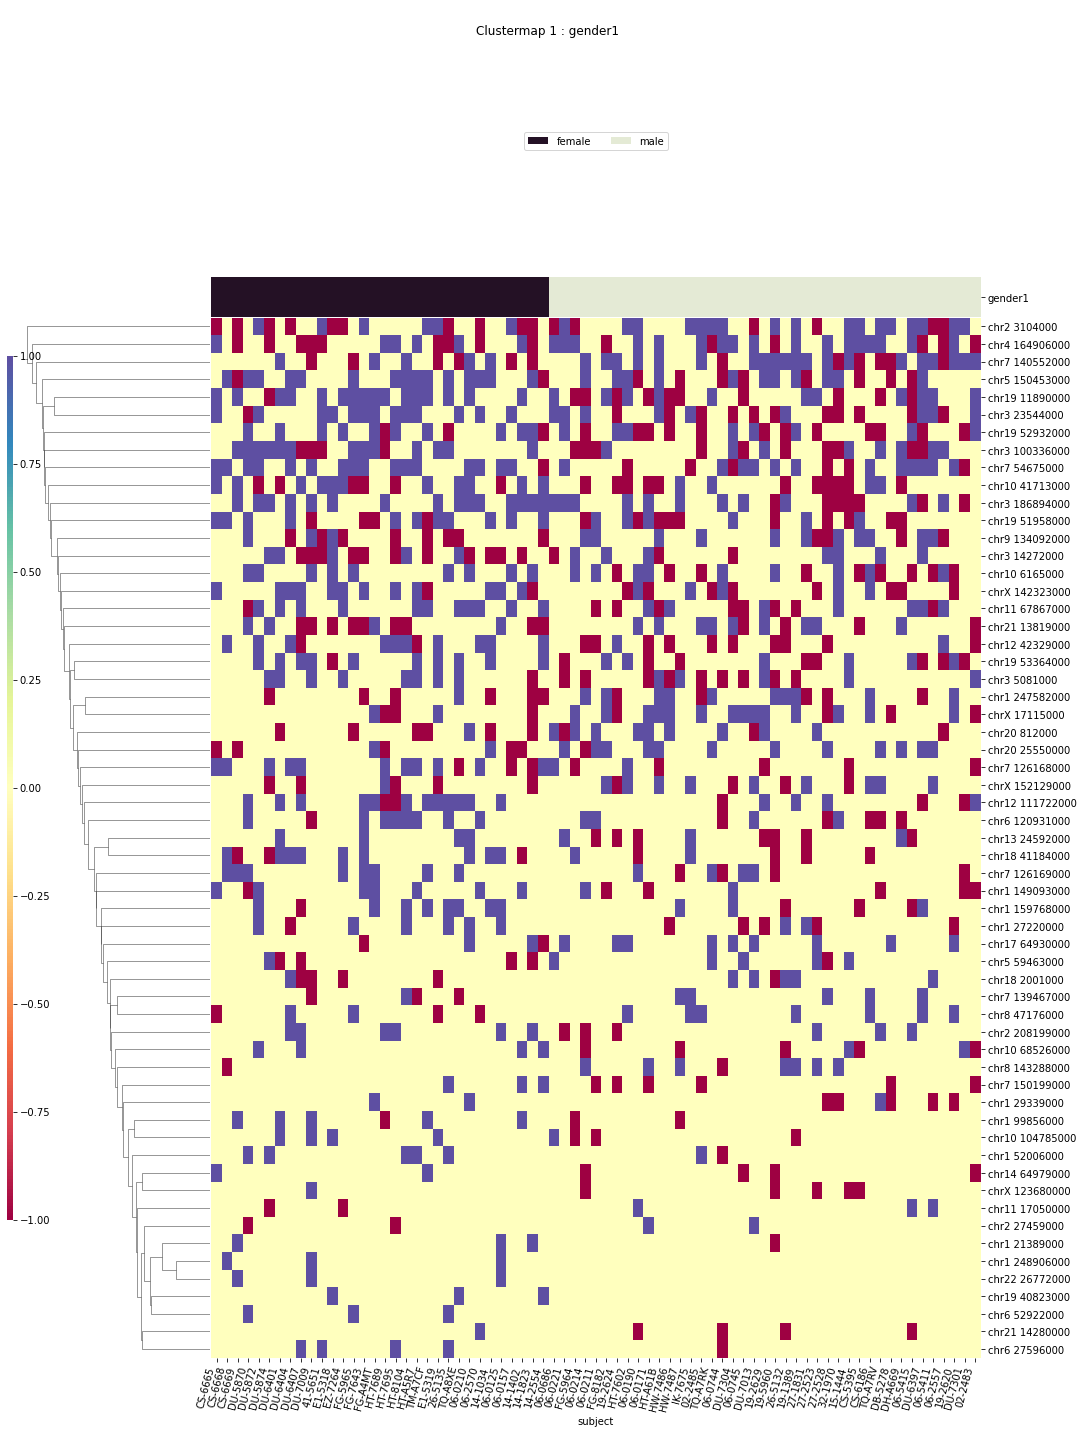

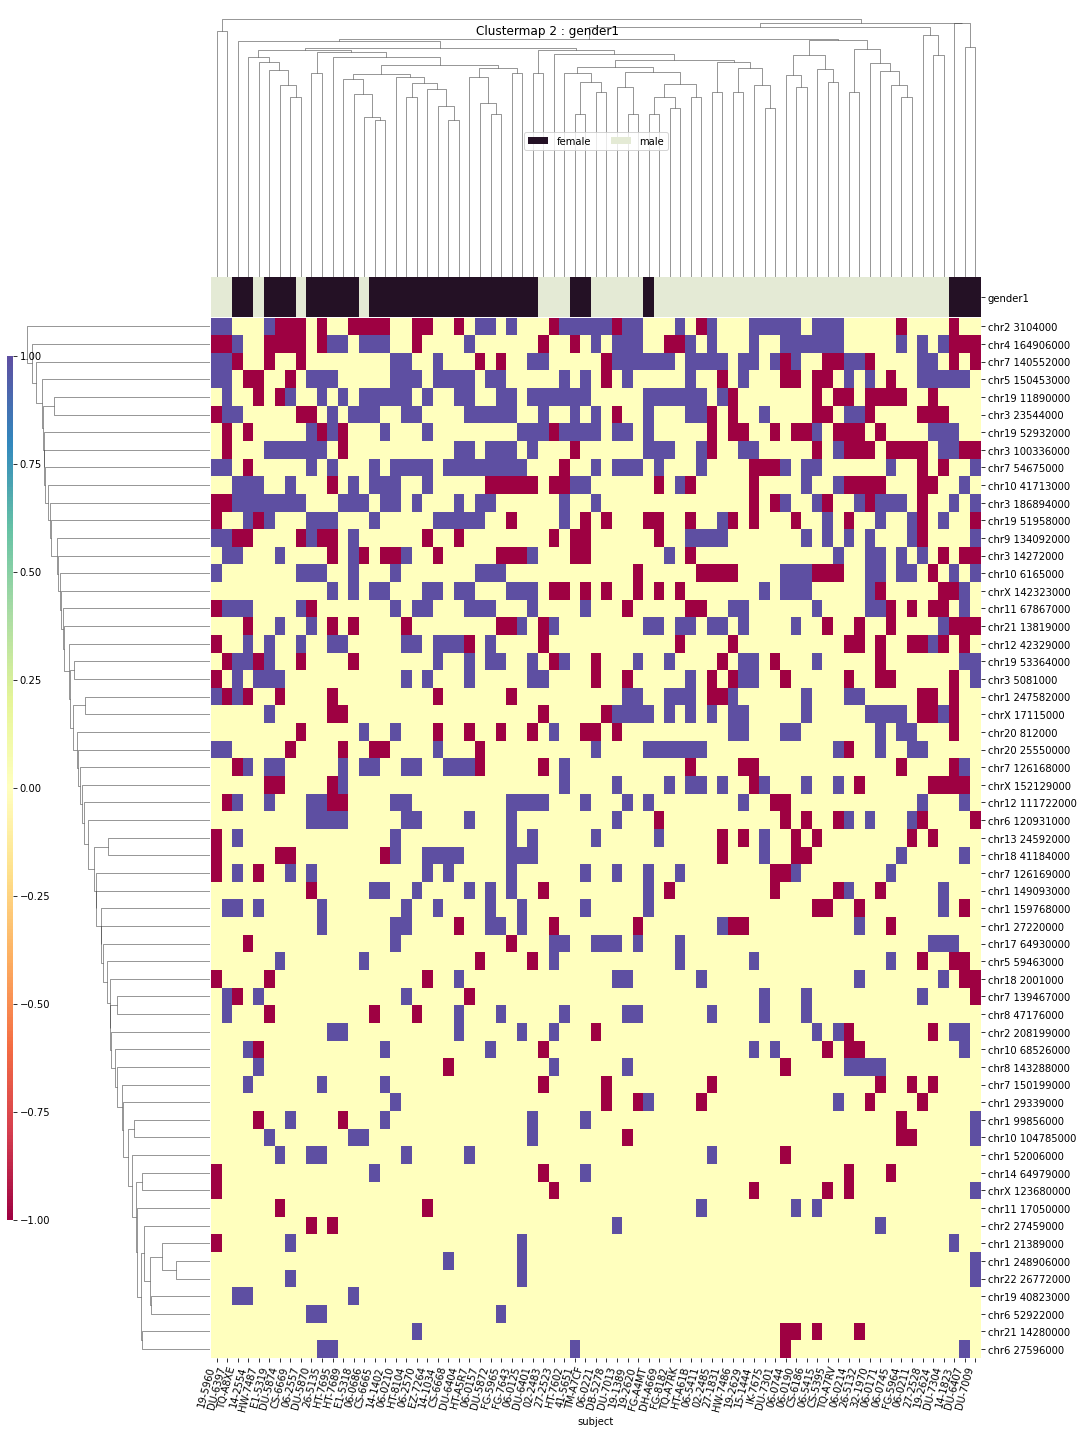

In [100]:
for column in 'primary_diagnosis','IDH','x1p19q','TERT','disease_type','IDH_1p19q_status','WHO_groups','Triple_group','MGMT','gender1':
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-8,heat_p=0.05)

In [101]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210620 21:18:05'

In [102]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [103]:
pd.set_option('display.max_columns', default_max_columns)

In [104]:
pd.set_option('display.max_rows',default_max_rows)

In [105]:
pd.set_option('display.precision', default_precision)